----------------------------------
# Project: Ensemble Techniques - Travel Package Purchase Prediction
###     - Using Bagging and Boosting Models (DecisionTree, RandomForest, Bagging, AdaBoost, GradientBoosting, XGBoost, and Stacking)   -     Josh Isaiah
----------------------------------

### Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.
Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.
However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.
However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to **`provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.`**

**Objective**

`To predict which customer is more likely to purchase the newly introduced travel package.
Data Dictionary`


**Data Description:**
1.	CustomerID: Unique customer ID
2.	ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
3.	Age: Age of customer
4.	TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
5.	CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6.	Occupation: Occupation of customer
7.	Gender: Gender of customer
8.	NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
9.	PreferredPropertyStar: Preferred hotel property rating by customer
10.	MaritalStatus: Marital status of customer
11.	NumberOfTrips: Average number of trips in a year by customer
12.	Passport: The customer has a passport or not (0: No, 1: Yes)
13.	OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
14.	NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
15.	Designation: Designation of the customer in the current organization
16.	MonthlyIncome: Gross monthly income of the customer

**Additional Data:**
1.	PitchSatisfactionScore: Sales pitch satisfaction score
2.	ProductPitched: Product pitched by the salesperson
3.	NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
4.	DurationOfPitch: Duration of the pitch by a salesperson to the customer


### Quick Links

- <a href = #link1>Problem Statement Review for Hypothesis formation </a>


- <a href = #link2>Libraries and Dataset Summary</a> 


- <a href = #link3>Exploratory Data Analysis</a>


- <a href = #link4>Data Pre-Processing </a> 


- <a href = #link5>Model Building</a>


- <a href = #link6>Bagging Models</a>


- <a href = #link7>Boosting Models</a>


- <a href = #link8>Stacking Model</a>


- <a href = #link9>Model Comparison</a>


- <a href = #link10>Business Recommendations</a>

### <a id = "link1"></a> Problem Statement Review for Hypothesis formation: 

#### Initial Data Review from Domain summary for Hypothesis formation:

**Some important Features that might affect Customers Purchasing the package:**
   
- Monthly Income
- Number Of PersonVisiting
- Number Of ChildrenVisiting
- Pitch Satisfaction Score
- ?
    
**Features that might not be important?**
- Customer ID
- Own Car?
- Passport?

**Checking what will cost client more:**
*Predicting a customer will purchase the package they DID NOT - False Positive*

*Predicting a customer will NOT purchase the package and they DID - False Negative*

- `Looks like False Positive will cost the client more. However we will decide what to use as metric in the model section`

### <a id = "link2"></a> Import Libraries and Dataset Summary

In [3]:
import warnings
warnings.filterwarnings("ignore")


# Libraries to help with reading and manipulating data and files
import pandas as pd
import numpy as np
import os

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 25)


# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to help with model building
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score,precision_score,confusion_matrix, precision_recall_curve, f1_score

#### Load and explore the data

In [4]:
# In this section the goals are to load the data into python and then to check its basic properties. 
# This will include the dimension, column types and names, and missingness counts.
tourism=pd.read_excel('Tourism.xlsx',sheet_name='Tourism') # load dataset

In [5]:
# make a copy of the original dataframe
data=tourism.copy()

In [6]:
# view first 5 data points
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [7]:
# view last 5 data points
data.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [8]:
data.sample(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2332,202332,0,44.0,Company Invited,1,23.0,Salaried,Male,3,5.0,Basic,3.0,Single,3.0,0,4,1,1.0,Executive,17290.0
1366,201366,0,39.0,Company Invited,3,27.0,Salaried,Female,2,5.0,Deluxe,3.0,Married,7.0,0,5,0,0.0,Manager,20736.0
1189,201189,0,33.0,Self Enquiry,3,8.0,Small Business,Male,3,3.0,Deluxe,3.0,Married,2.0,0,3,1,1.0,Manager,20505.0
522,200522,0,37.0,Self Enquiry,1,NaN,Salaried,Male,3,2.0,Basic,3.0,Single,4.0,0,4,1,1.0,Executive,19680.0
4603,204603,1,21.0,Self Enquiry,1,11.0,Large Business,Male,3,4.0,Basic,5.0,Unmarried,3.0,0,3,1,1.0,Executive,21651.0
4808,204808,0,55.0,Self Enquiry,1,10.0,Salaried,Male,3,4.0,Super Deluxe,3.0,Married,NaN,0,5,0,1.0,AVP,36457.0
1316,201316,0,43.0,Company Invited,3,8.0,Salaried,Male,3,3.0,Deluxe,3.0,Married,2.0,0,3,1,2.0,Manager,20675.0
4524,204524,0,28.0,Self Enquiry,1,12.0,Large Business,Male,3,5.0,Standard,3.0,Married,3.0,1,3,1,2.0,Senior Manager,31486.0
4435,204435,0,28.0,Company Invited,3,10.0,Small Business,Female,4,2.0,Deluxe,3.0,Married,3.0,1,1,1,1.0,Manager,23325.0
3592,203592,0,40.0,Self Enquiry,1,17.0,Small Business,Male,4,4.0,Deluxe,5.0,Married,4.0,0,5,1,3.0,Manager,24055.0


- `CustomerID` will probably not have effect on the model performance, however we will reaccess if we need to drop it after our EDA to see if there are any correlation with other features
- `PreferredPropertyStar` shows some NaN. We will see all the other features in the info section

#### Shape and information of Dataset

In [9]:
print('*********************** Data Info ***********************')
print(data.info())

print('\n','*********************** Data Shape (Rows, Columns) ***********************')
print(data.shape)

*********************** Data Info ***********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  Numbe

**Observations**
- `Shape` of the dataset is 4888 rows and 20 columns (features)
- `TypeofContact` , `Occupation` , `Gender` , `ProductPitched`, `MaritalStatus` ,  and `Designation` are all objects
- There are missing values in `Age`,`DurationOfPitch`,`NumberOfFollowups`,`PreferredPropertyStar`,`NumberOfTrips`,`NumberOfChildrenVisiting`,`MonthlyIncome`
- Most of the features are loaded as int or float, these will be converted to catogerical datatype along with the objects:
    - CityTier
    - PreferredPropertyStar
    - Passport
    - OwnCar

In [10]:
# looking at which columns have the most missing values and the unique values numbers
print('*********************** Missing Values ***********************')
print(data.isna().sum().sort_values(ascending=False))

print('\n','*********************** Unique Values ***********************')
print(data.nunique().sort_values(ascending=False))

*********************** Missing Values ***********************
DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Passport                      0
MaritalStatus                 0
ProductPitched                0
Designation                   0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
PitchSatisfactionScore        0
CityTier                      0
OwnCar                        0
ProdTaken                     0
CustomerID                    0
dtype: int64

 *********************** Unique Values ***********************
CustomerID                  4888
MonthlyIncome               2475
Age                           44
DurationOfPitch               34
NumberOfTrips                 12
NumberOfFollowups              6
ProductPitched        

**Observations**
- `DurationOfPitch` has the highest number of missing values followed by `MonthlyIncome`,`Age`, `NumberOfTrips`, etc
-  Most Features are loaded as int or floatof the dataset is 4888 rows and 20 columns (features)
- `TypeofContact` , `Occupation` , `Gender` , `ProductPitched`, `MaritalStatus` ,  and `Designation` are all objects

In [11]:
# #loop through each  colum to see how often each entry occurs
for i in data.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*60)

Unique values in CustomerID are :
200702    1
201479    1
203514    1
201467    1
203518    1
         ..
204257    1
200163    1
202212    1
204261    1
204800    1
Name: CustomerID, Length: 4888, dtype: int64
************************************************************
Unique values in ProdTaken are :
0    3968
1     920
Name: ProdTaken, dtype: int64
************************************************************
Unique values in Age are :
35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
       ... 
58.0     31
60.0     29
57.0     29
18.0     14
61.0      9
Name: Age, Length: 44, dtype: int64
************************************************************
Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
************************************************************
Unique values in CityTier are :
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
*********************************************************

**Observation:**
- The Gender Feature has Fe Male as an input 155 times. This will be fixed in Feature Engineering later

In [12]:
## Converting the data type of categorical features to 'category'
cat_cols = ['ProdTaken','TypeofContact','Occupation' , 'Gender' , 'ProductPitched', 'MaritalStatus' , 'Designation'
           ,'PreferredPropertyStar','CityTier','Passport','OwnCar']
data[cat_cols] = data[cat_cols].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   category
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   category
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   category
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

#### Data Summary

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.00,3.0,4.00,5.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.00,1.0,2.00,3.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.00,22347.0,25571.00,98678.0


In [14]:
#categorical data summary
data.describe(include=['category']).T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
PreferredPropertyStar,4862,3,3,2993
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466
OwnCar,4888,2,1,3032


In [15]:
data.DurationOfPitch.mean()

15.490834591330602

**Observations:**
- Average `Age` is ~37 years with the oldest customer being 61 and youngest 18. Looks fairly distributed
- Longest duration of the pitch by a salesperson to the customer is ~127 (not sure of the unit of measure). Average time it takes a salesperson to pitch is ~15. Rightly skewed based on the data
- Maximum number of persons planning to take the trip with the customer is 5 with an Average of 3. Fairly distributed
- Number of Trips in a year by customer has a max. value of 22 and average of 3. There seem to be some right skewness to this feature as well.
- Monthly income as expected is rightly skewed and will probably contains some outliers. With average income of 23,600
- Of al the customers' whose data were collected, 3,968 did not take the Product/package. This will put some bias in the model training/testing data. We will fix it later.
- There were more Male in the dataset than female. Gender has a typo, as seen earlier in value_counts, Fe Male. This should be Female. It will be fixed later
- Marital Status could be combined to form a new Feature to just Married or Single.  Divorce and Unmarried could be all included as Single.

#### Fix the Gender Feature

In [16]:
data['Gender'].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [17]:
data['Gender']=data.Gender.replace('Fe Male', 'Female')

In [18]:
data['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

### <a id = "link3"></a> Exploratory Data Analysis

### Univariate analysis

In [19]:
# data.isnull().sum().sort_values(ascending=False)

In [20]:
# data[data.MonthlyIncome.isnull()]

**Let us write a function that will help us create boxplot and histogram for any input numerical feature**

In [21]:
## Source: Weekly Project code

# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='bisque') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="red") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='blue', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='red', linestyle='-') # Add median to the histogram

#### Observation on Age

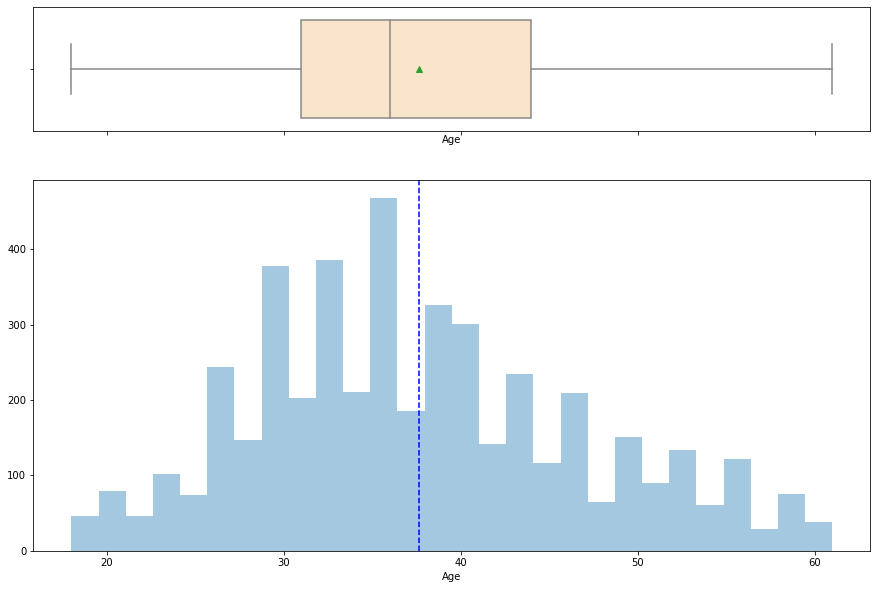

In [22]:
histogram_boxplot(data.Age)

- Age looks fairly distributed. with a very slight right skew
- Average Age of customers is ~38 and Median Age of ~36
- Oldest customer is 61 yrs old

#### Observation on Duration Of Pitch

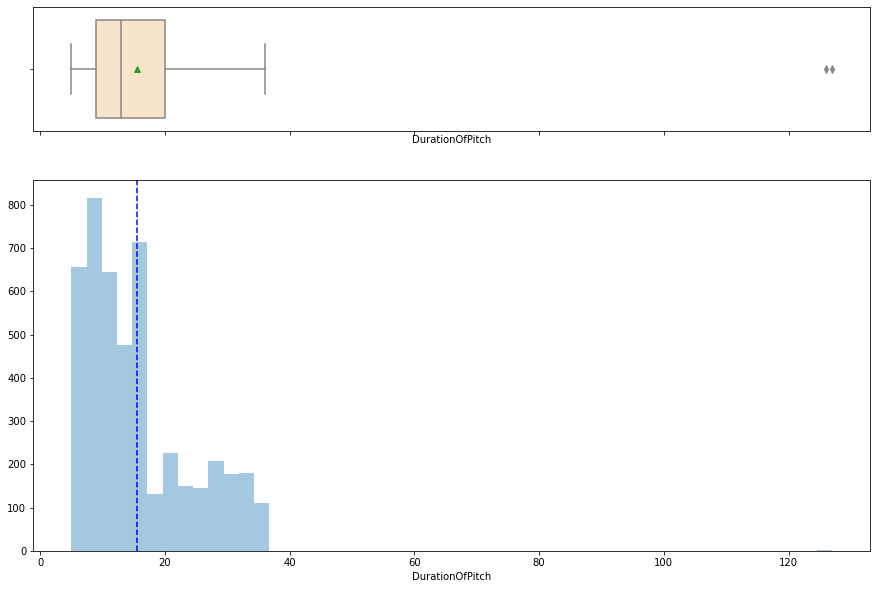

In [23]:
histogram_boxplot(data.DurationOfPitch)

- Average time it takes to pitch the product is ~15.5
- The `DurationOfPitch` is rightly skewed
- There are 2 outliers in the DurationOfPitch feature

#### Observation on Number Of Person Visiting

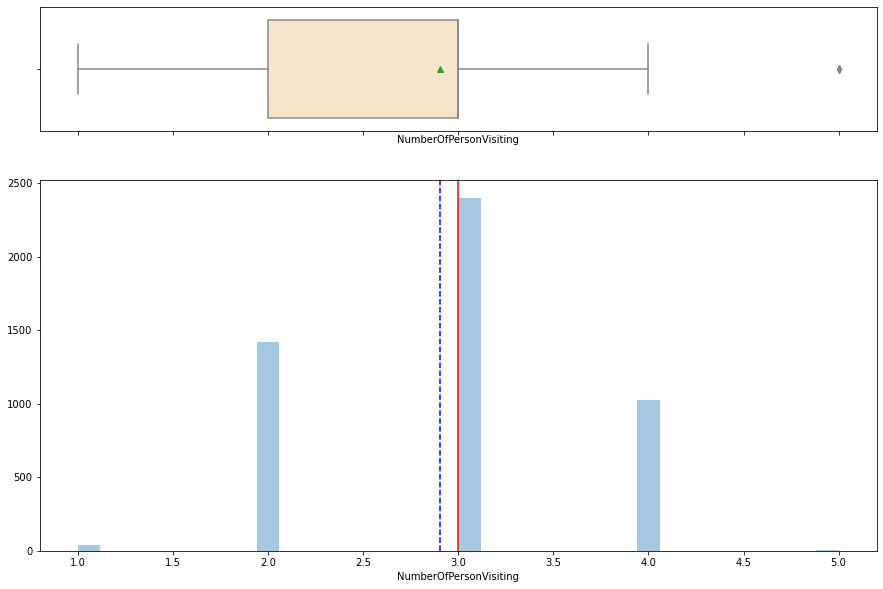

In [24]:
histogram_boxplot(data.NumberOfPersonVisiting)

- This should be a categorical variable, however we will use it as numeric because we can not fix the max. number of persons visiting
- `NumberOfPersonVisiting` is fairly distributed
- Average number of person visiting is ~3, with maximum number of 5
- There is an outlier present in the feature

#### Observation on Number Of Followups 

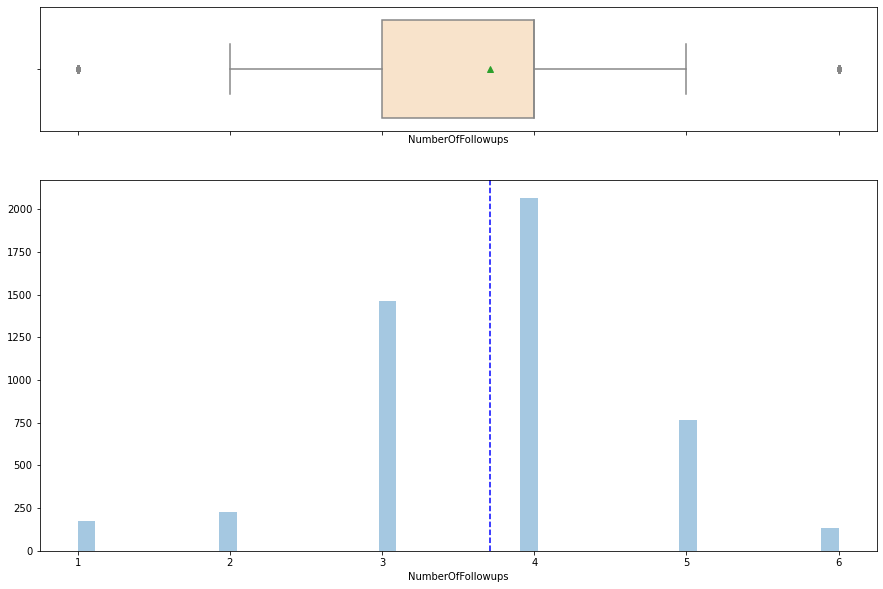

In [25]:
histogram_boxplot(data.NumberOfFollowups)

In [26]:
data.NumberOfFollowups.mode()

0    4.0
dtype: float64

- Number of follow ups shows similar attributes to the Number of Person Visiting in that it should probably be a categorical feature, however this number could easily be a higher number as well
- Average is ~3.7, with the highest frequency (mode) being 4.
- Seems to be fairly distributed with outliers on both sides of the whiskers of the boxplot

#### Observation on Number Of Trips 

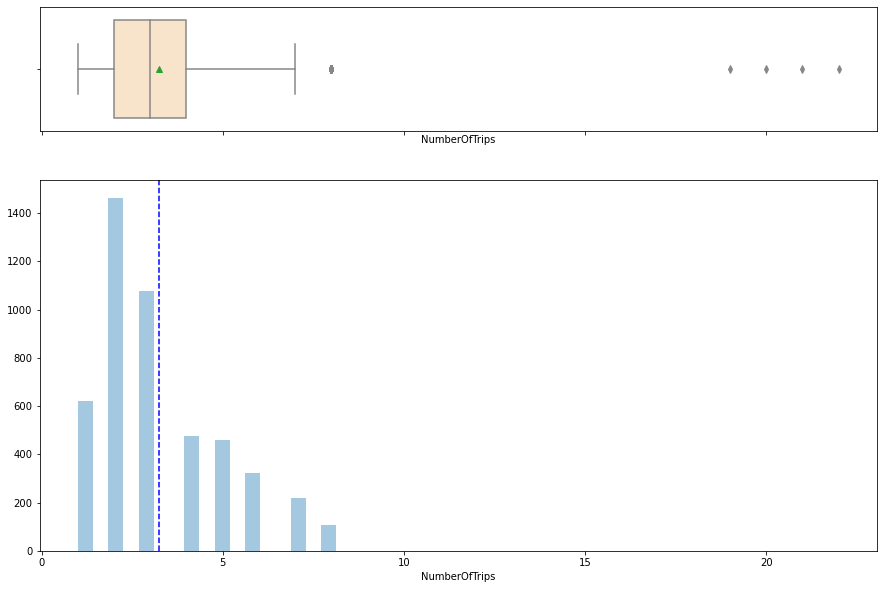

In [27]:
histogram_boxplot(data.NumberOfTrips)

- Minimum number of trips in the dataset is 1 with a maximum of 22
- Customers that have travel the most seems to have 2 trips with an average number of trips of ~3
- Number of Trips is rightly skewed with outliers. It will be interesting to see the relationship between number of trips versus marital status

#### Observation on Pitch Satisfactory Score

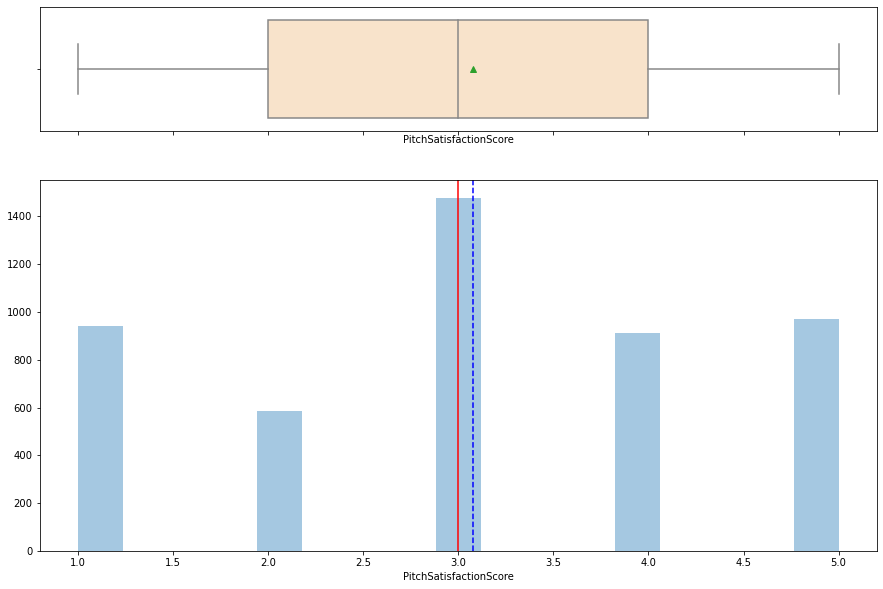

In [28]:
histogram_boxplot(data.PitchSatisfactionScore)

- Average Pitch Satisfactory Score is ~3, which corresponds to the median and mode
- Pitch Satisfactory score is looks normally distributed
- Actually, this is a good feature for a Categorical Feature. We will convert it

##### Convert PitchSatisfactionScore to a Categorical Feature

In [29]:
data.PitchSatisfactionScore=data.PitchSatisfactionScore.astype('category')

#### Observation for Number of Children Visiting

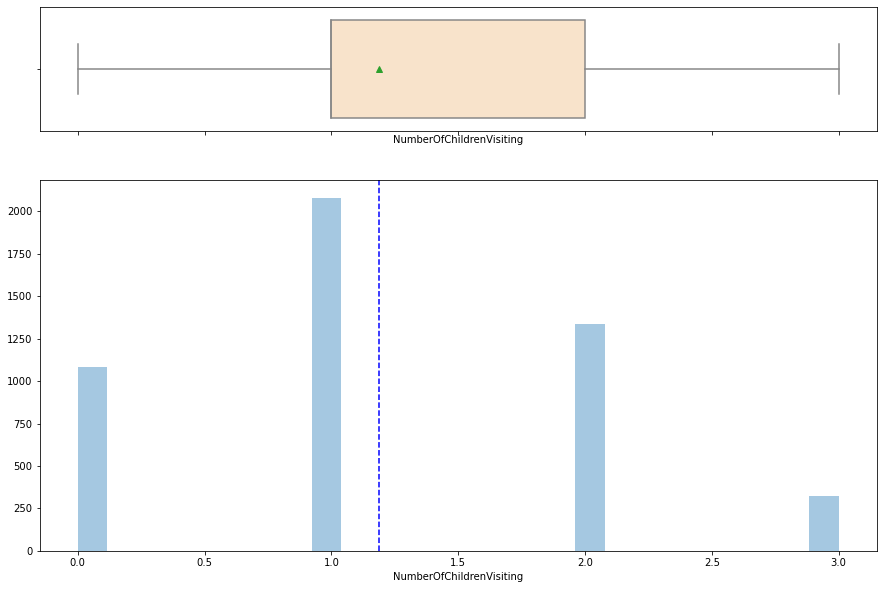

In [30]:
histogram_boxplot(data.NumberOfChildrenVisiting)

- Minimum number of children visiting is 0, which indicates no kids travel on that trip
- Average is ~1 with max. number being 3
- No outliers and it is fair distributed

#### Observation for Monthly Income

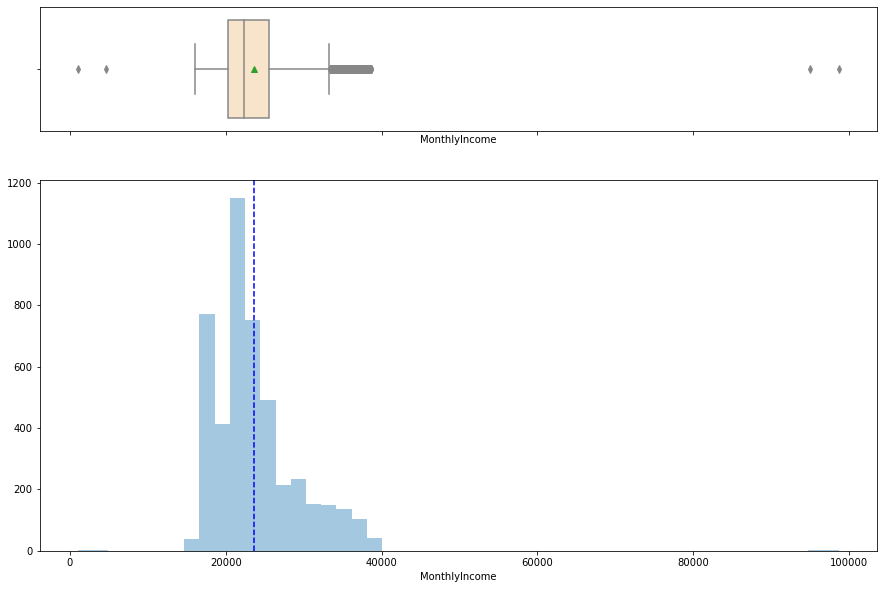

In [31]:
histogram_boxplot(data.MonthlyIncome)

- Monthly Income has outliers on both sides of the whiskers of the boxplot, which is expected when dealing with features that deals with wages or money
- Rightly skewed, with an average income of 23,600
- Max. Monthly income is ~98,600

#### Bar Plot for Categorical Features Analysis

In [32]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
        
    plt.show() # show the plot

##### Observation on Product Taken - Dependent Feature

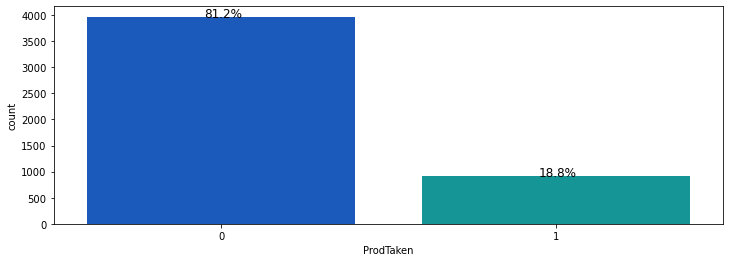

In [33]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data.ProdTaken,palette='winter')
perc_on_bar(ax,data.ProdTaken)

- 81% of Customers has not purchase the product and ~19% purchase. 
- This will create some bias in the training/test data for the model. We will use class_weights where possible to compensate

##### Observation on City Tier

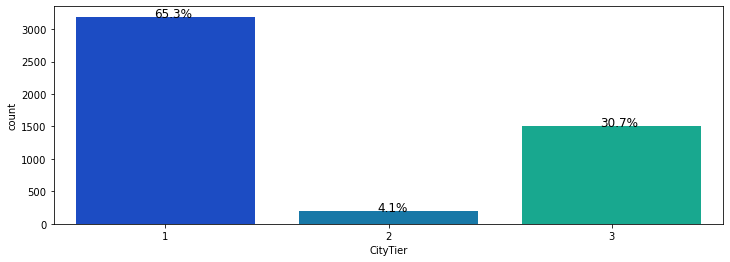

In [34]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data.CityTier,palette='winter')
perc_on_bar(ax,data.CityTier)

- Most of the customers, ~65.3%, live in Tier 1
- Tier 2 has the least customers with 4.1%

##### Observation on Type of Contact

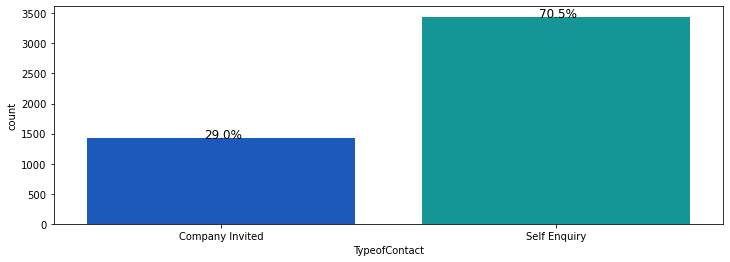

In [35]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data.TypeofContact,palette='winter')
perc_on_bar(ax,data.TypeofContact)

- Most of the customers contacted the Travel Agency themselves, 70.5% while 29% were contacted via company invite

##### Observation on Occupation

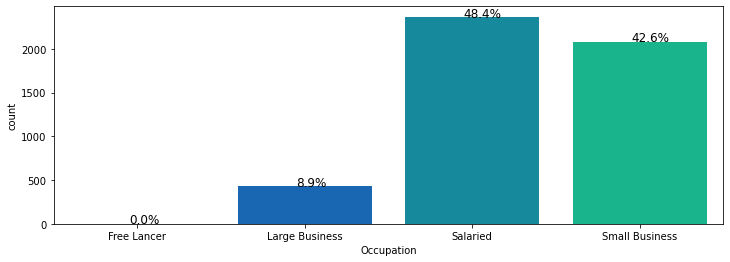

In [36]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data.Occupation,palette='winter')
perc_on_bar(ax,data.Occupation)

- As expected in almost half of the customers contacted are salaried workers, 48.4%
- Total number of Free Lancer is 0.04% of the customers contacted and 42.6% were Small Business owners.
- This is a good description of the society occupation

##### Observation on Gender

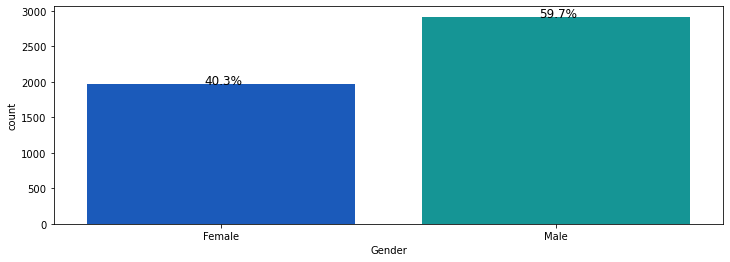

In [37]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data.Gender,palette='winter')
perc_on_bar(ax,data.Gender)

- Male, 59.7%, were the most contacted customers with Female being 40.3%

##### Observation on Product Pitched

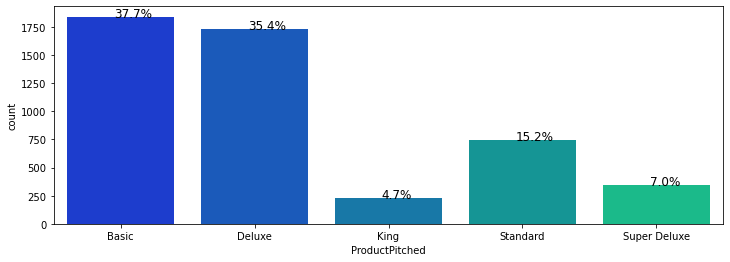

In [38]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data.ProductPitched,palette='winter')
perc_on_bar(ax,data.ProductPitched)

- The Basic product, 37.7%, was mostly pitched by the sales team followed by Deluxe package.
- The King product is the least at 4.7%

##### Observation on Preferred Property Star - Hotel Property Rating by Customer

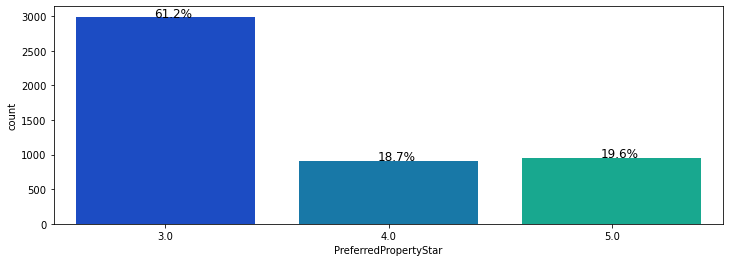

In [39]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data.PreferredPropertyStar,palette='winter')
perc_on_bar(ax,data.PreferredPropertyStar)

- Customers like the 3.0 rated Hotel Property the most, coming in at 61.2%, whith 4.0 and 5.0 being pretty close at 18.7% and 19.6%

##### Observation on Marital Status

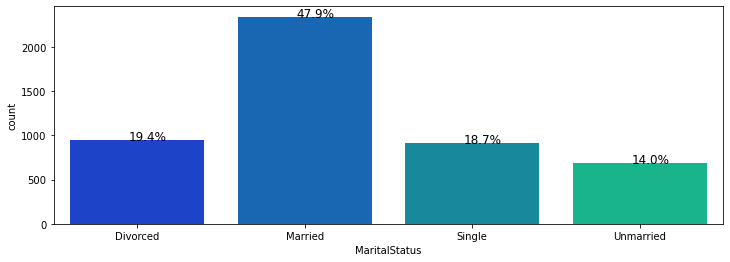

In [40]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data.MaritalStatus,palette='winter')
perc_on_bar(ax,data.MaritalStatus)

- Married Customers ranked high at 47.9% with Divorce and Single coming close next at 19.4% and 18.7%. 
- Umarried is the least with 14.0%
- It will be a great idea to combine the Divorced and Umarried into Single, thus we will have just 2 unique values in the Marital Status feature of Married or Single

#### Creating a New Feature for Marital Status by combining Divorced and Unmarried into Single

In [41]:
# data[data['MaritalStatus']=='Divorced']

In [42]:
data['Marital_Status']=data['MaritalStatus']
# Creat a new feature and convert Divorced and Unmmarried to Single
print('*'*10,'Marital Status Before Conversion','*'*10)
data.Marital_Status.value_counts()

********** Marital Status Before Conversion **********


Married      2340
Divorced      950
Single        916
Unmarried     682
Name: Marital_Status, dtype: int64

In [43]:
# convert Divorced and Unmmarried to Single
# syntax- DataFrame.replace({'column_name' : { old_value_1 : new_value_1, old_value_2 : new_value_2}})

data.replace({'Marital_Status':{'Divorced':'Single','Unmarried':'Single'}},inplace=True)

print('*'*10,'Marital Status After Conversion to New Feature','*'*10)
data.Marital_Status=data.Marital_Status.astype('category')
data.Marital_Status.value_counts()

********** Marital Status After Conversion to New Feature **********


Single     2548
Married    2340
Name: Marital_Status, dtype: int64

##### Observation on Marital Status - New Feature

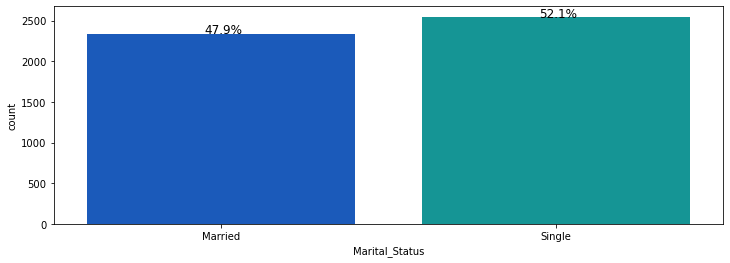

In [44]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data.Marital_Status,palette='winter')
perc_on_bar(ax,data.Marital_Status)

- Married Customers now ranked low at 47.9% with Single clients coming higher after the feature engineering to 52.1%

##### Observation on Passport

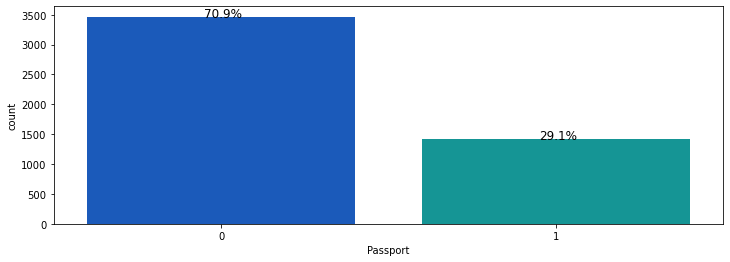

In [45]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data.Passport,palette='winter')
perc_on_bar(ax,data.Passport)

- Customers without passports are more at 70.9% versus customers with passports at 29.1%.  This might have effect on travels especially if it is international.

##### Observation on  Pitch Satisfaction Score

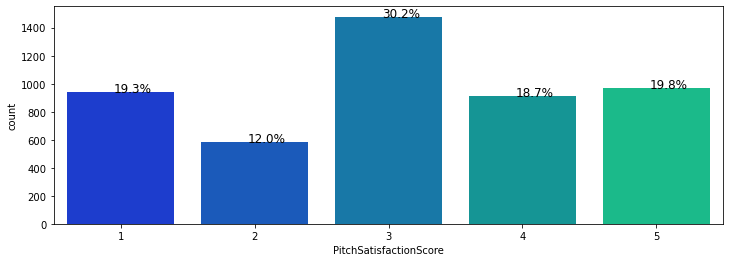

In [46]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data.PitchSatisfactionScore,palette='winter')
perc_on_bar(ax,data.PitchSatisfactionScore)

- Sales Pitch satisfaction ranked highest at 3.0 with 30.2%.
- 1.0 and 5.0 ranked very close at 19.3% and 19.8%

##### Observation on Car Ownership

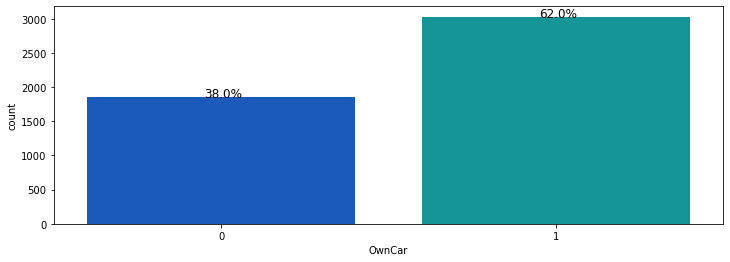

In [47]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data.OwnCar,palette='winter')
perc_on_bar(ax,data.OwnCar)

- 62% of customers own cars while 38% does not

##### Observation on Designation

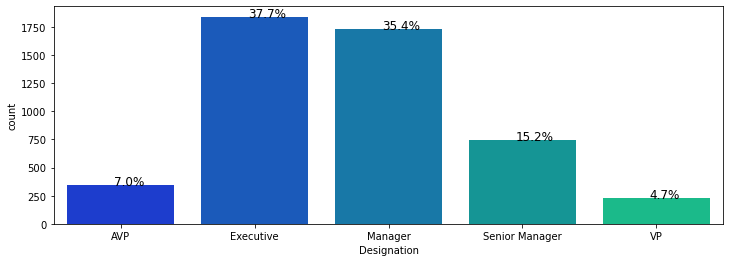

In [48]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data.Designation,palette='winter')
perc_on_bar(ax,data.Designation)

- 37.7% of the potential customers are Executives, with Manager coming next at 35.4%. 
- VP and AVP are the least at 4.7% and 7.0%

### Bivariate Analysis

- Let's look into bivariate analysis to see relationships between Features, and the independent variable

In [49]:
data = data.drop(['CustomerID'], axis=1)

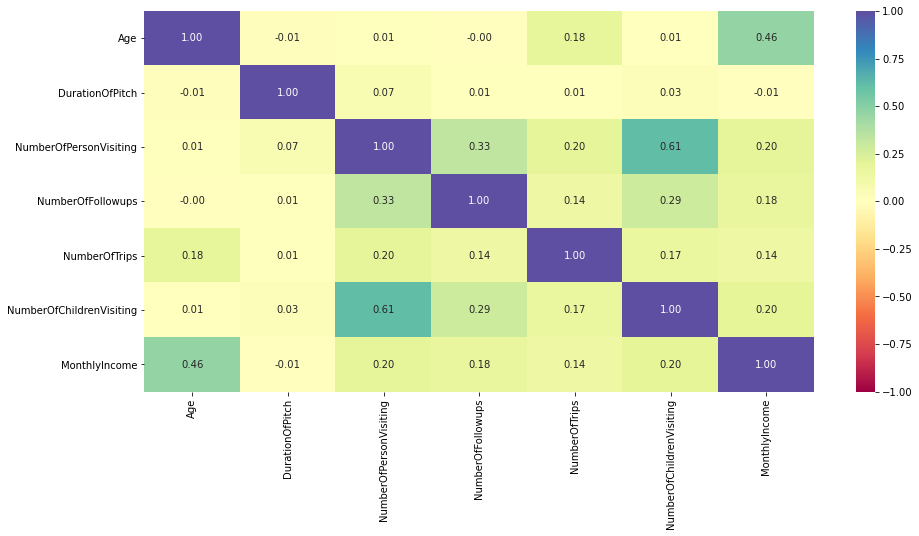

In [50]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

- There is no strong correlation between the numerical features.
- NumberOfPersonVisiting is slightly correlated with NumberOfChildrenVisiting, which makes sense because Children are persons
- Not as strong, but Age and Monthly Income are the next two features that shows some correlation
- Age and Duration of Pitch shows a negative (very insignifacant and almost zero) correlation. Which could mean the older the potential client the least time spend with them during the pitch. This value is almost zero so we can not conclude

In [51]:
# Placeholder for Numerical columns
num_col=['Age','DurationOfPitch','NumberOfPersonVisiting','NumberOfFollowups','NumberOfTrips','NumberOfChildrenVisiting',
         'MonthlyIncome']

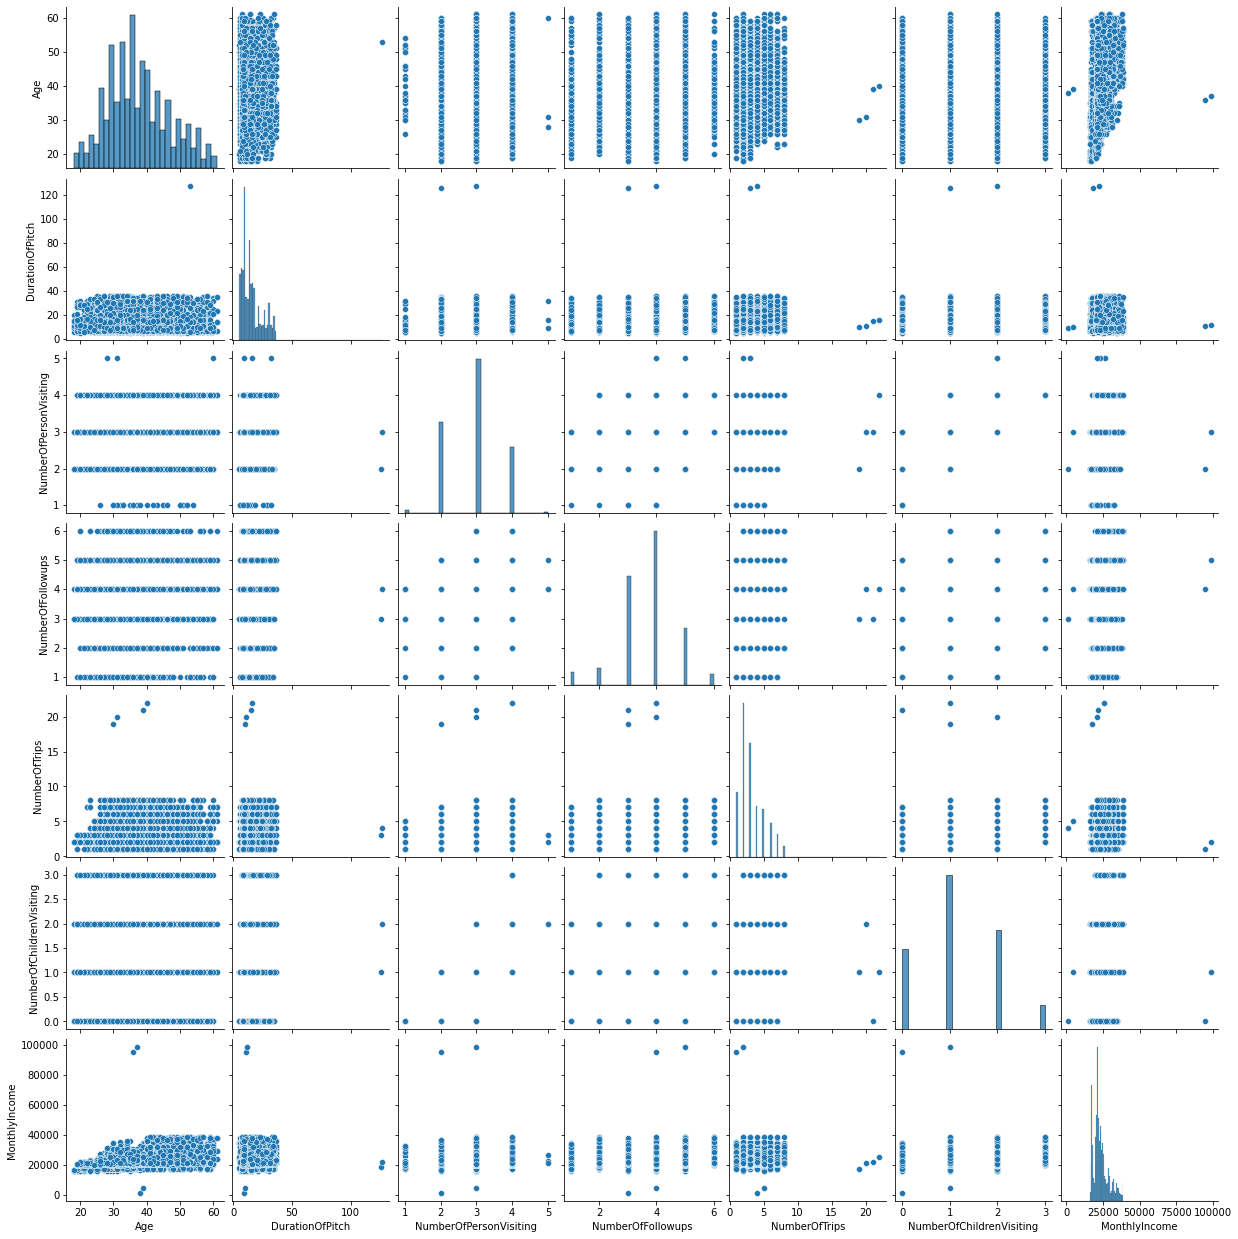

In [52]:
sns.pairplot(data[num_col])
plt.show()

- No strong correlation between the numerical features

In [53]:
### Function to plot distributions and Boxplots of customers

def plot(x,target='ProdTaken'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title(f'Plot of {x}  of customer who Purchase Package',fontsize=12,fontweight='bold')
    sns.distplot(data[(data[target] == 1)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title(f"Plot of {x}  of customer who doesn't Purchase Package",fontsize=12,fontweight='bold')
    sns.distplot(data[(data[target] == 0)][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title(f'Boxplot of {x} w.r.t Product',fontsize=12,fontweight='bold')
    
    line = plt.Line2D((.1,.9),(.5,.5), color='grey', linewidth=1.5,linestyle='--')
    fig.add_artist(line)
   
    sns.boxplot(data[target],data[x],ax=axs[1,0],palette='gist_rainbow',showmeans=True)
    axs[1,1].set_title(f'Boxplot of {x} w.r.t Product - Without outliers',fontsize=12,fontweight='bold')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow',showmeans=True) #turning off outliers from boxplot
    plt.tight_layout(pad=4)
    plt.show()

### Purchased Package vs Age

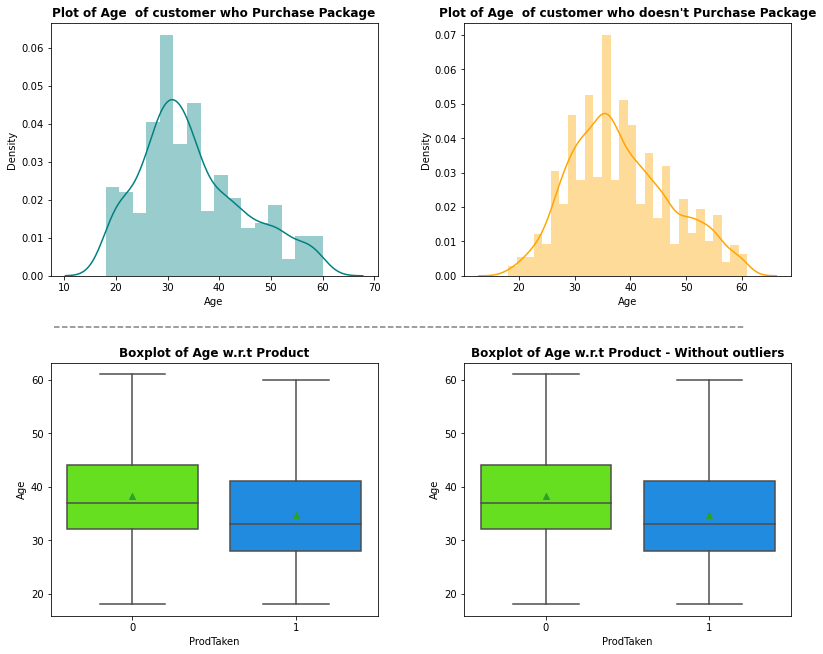

In [54]:
plot('Age')

- Customers below 40 seems to have higher chances of purchasing the Product. Older customers shows lower probability

### Purchased Package vs Duration of Pitch

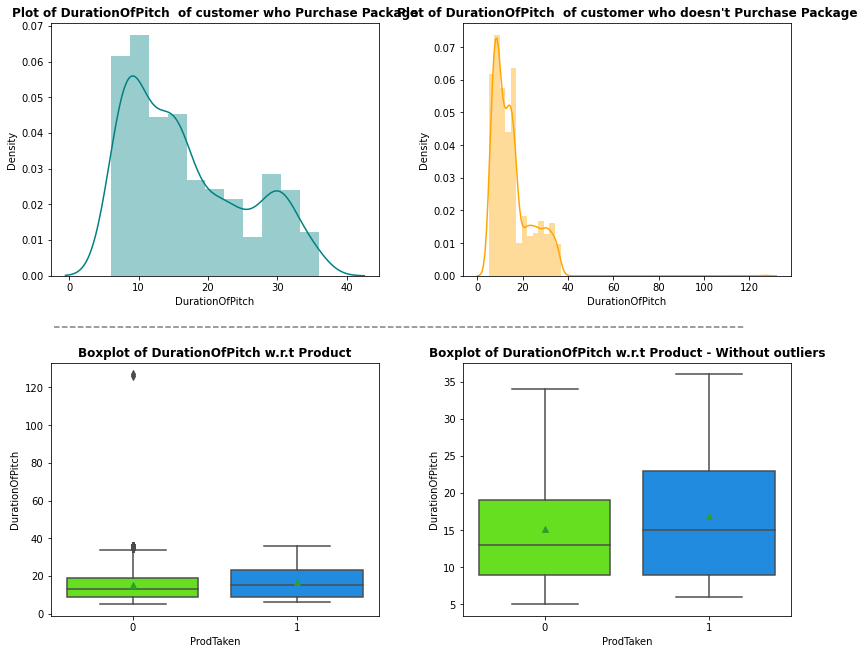

In [55]:
plot('DurationOfPitch')

- Seems effective sales Pitch less than 20 shows higher chances of customer purchasing package

### Purchased Package vs Number Of Person Visiting

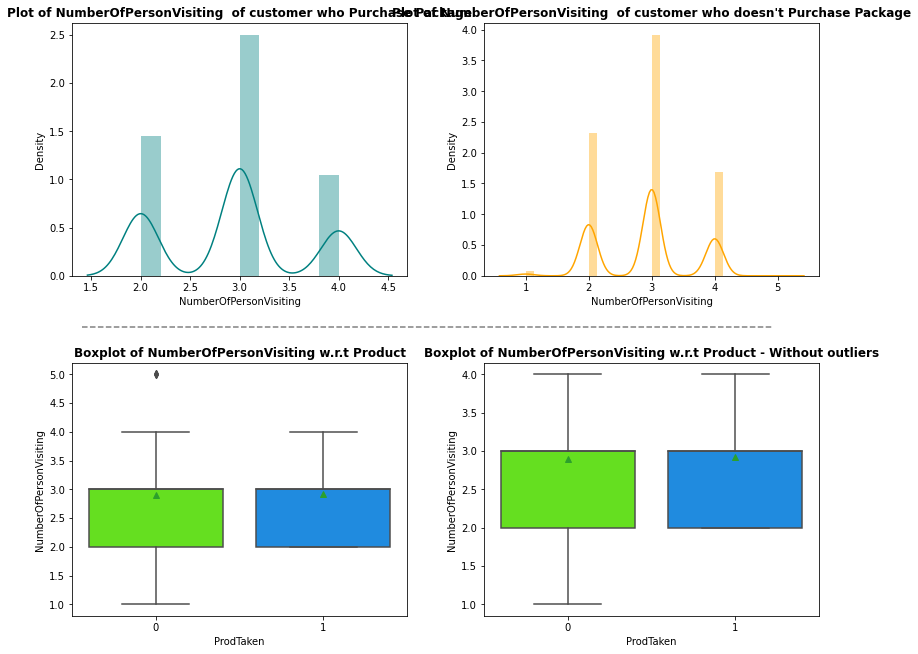

In [56]:
plot('NumberOfPersonVisiting')

- There is no difference in the customers that purchased the package based on the number of persons visiting

### Purchased Package vs Number of Follow Ups

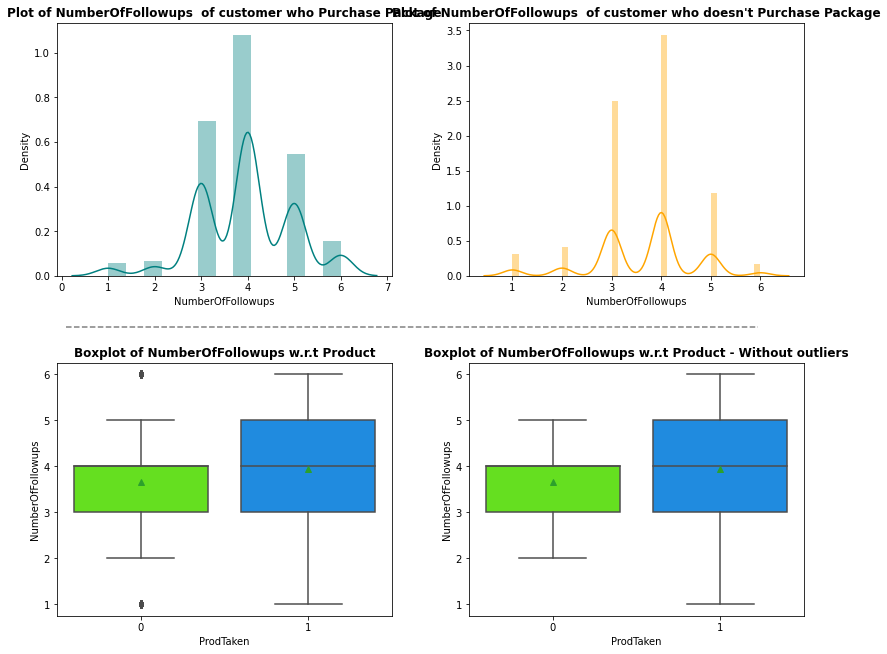

In [57]:
plot('NumberOfFollowups')

- Customers that were followed up more purchased the package

### Purchased Package vs Number of Trips

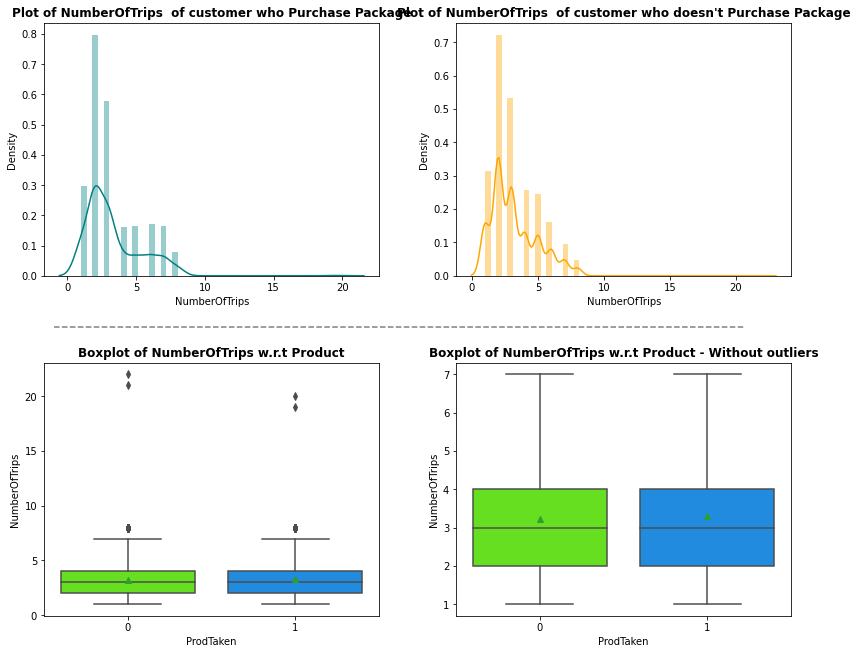

In [58]:
plot('NumberOfTrips')

- There is no difference in the customers that purchased the package based on the number of trips

### Purchased Package vs Number of Children Visiting

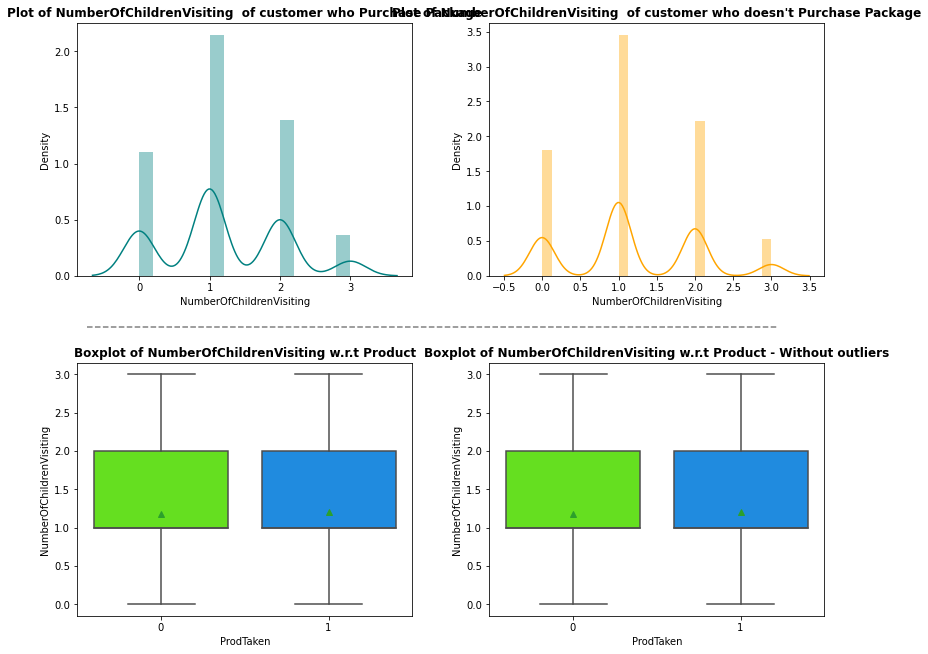

In [59]:
plot('NumberOfChildrenVisiting')

- There is no difference in the customers that purchased the package based on the number of Children Visiting

### Purchased Package vs Monthly Income

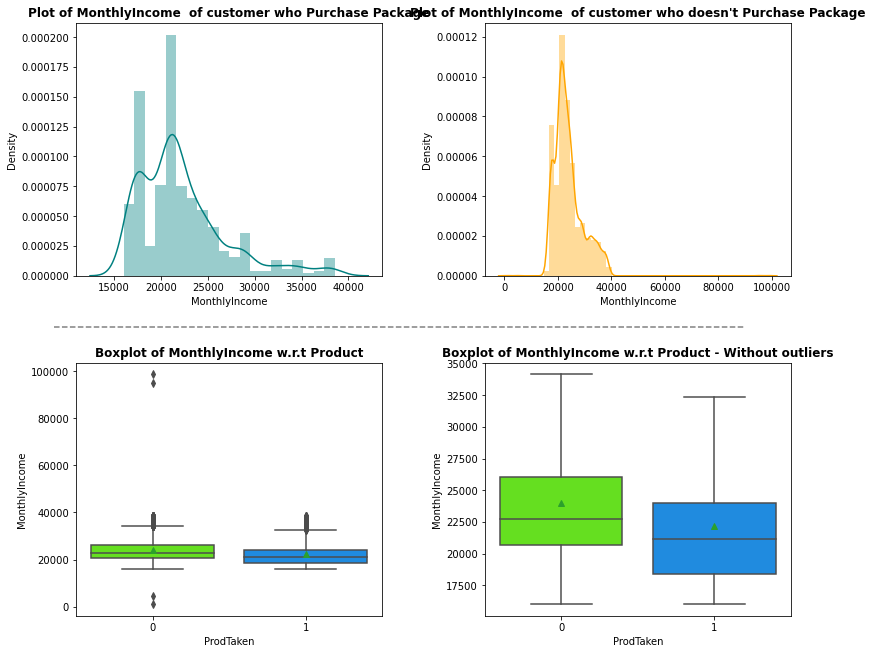

In [60]:
plot('MonthlyIncome')

- Lower Monthly Earners shows to have purchased the package versus higher monthly earners.
- This is interesting because you will think that the reverse should be the case

In [61]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,data['ProdTaken'],margins=True).sort_values(by=1,ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,data['ProdTaken'],normalize='index').sort_values(by=1,ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

### Purchased Package vs Type of Contact

ProdTaken           0    1   All
TypeofContact                   
All              3946  917  4863
Self Enquiry     2837  607  3444
Company Invited  1109  310  1419
------------------------------------------------------------------------------------------------------------------------


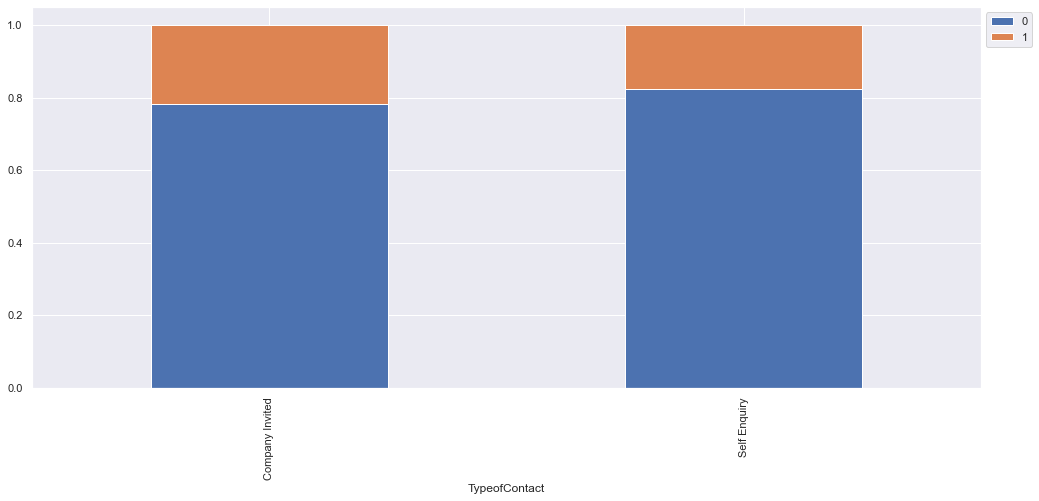

In [62]:
stacked_plot(data.TypeofContact)

- Customers contacted via company invitation purchased the package more compared to self enquiry

### Purchased Package vs City Tier

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


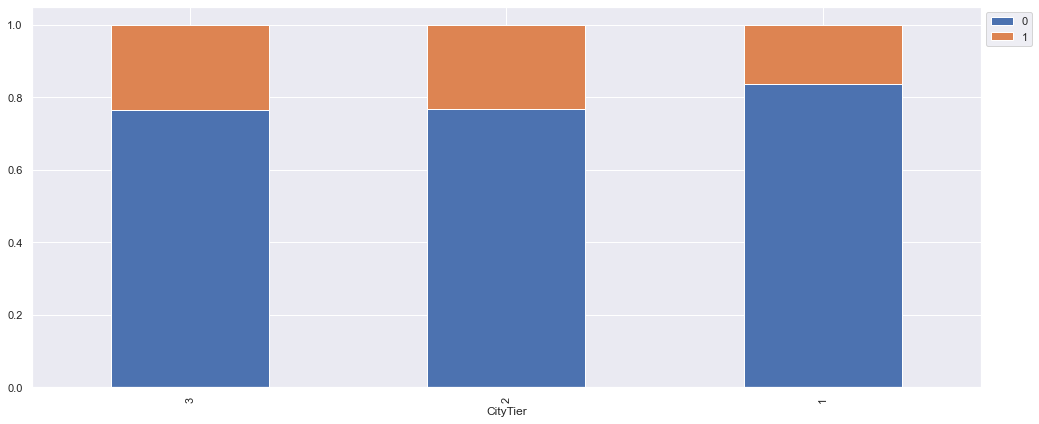

In [63]:
stacked_plot(data.CityTier)

- City Tier 2 and 3 have more customers purchasing the package compared to Tier 1

### Purchased Package vs Occupation

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


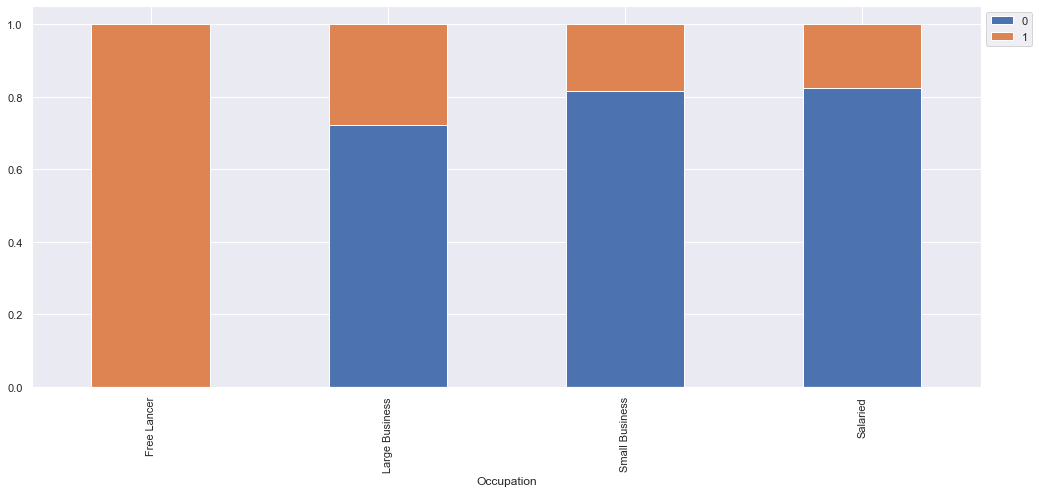

In [64]:
stacked_plot(data.Occupation)

In [65]:
# data[data['Occupation']=='Free Lancer']

- All 2 Free Lancer data in the Occupation feature purchased the package.  This sample is small, but it is definitely interesting
- Large Business owners comes in next on the Occupation to purchase the package with Small Business and Salaried being equal

### Purchased Package vs Gender

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1630  342  1972
------------------------------------------------------------------------------------------------------------------------


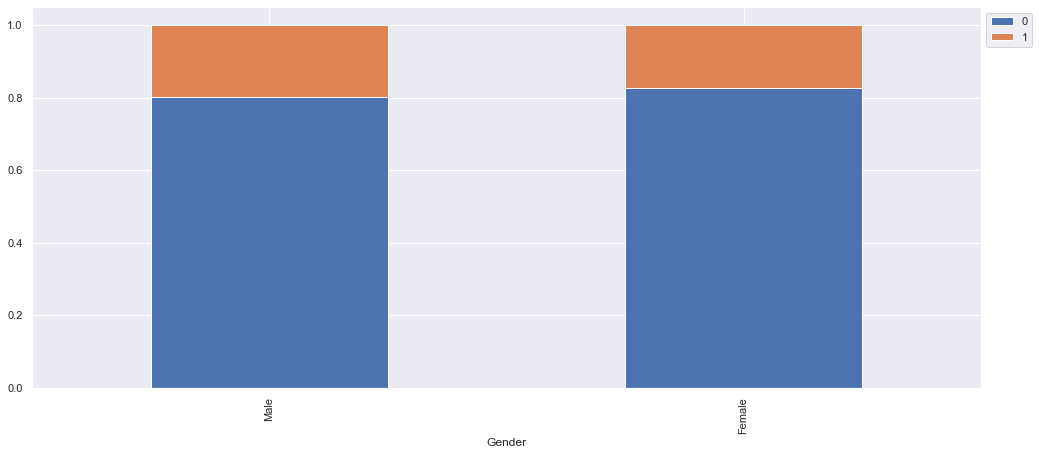

In [66]:
stacked_plot(data.Gender)

- Number of Male and Female that purchased the package are almost same, the male are a little more

### Purchased Package vs Product Pitched

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


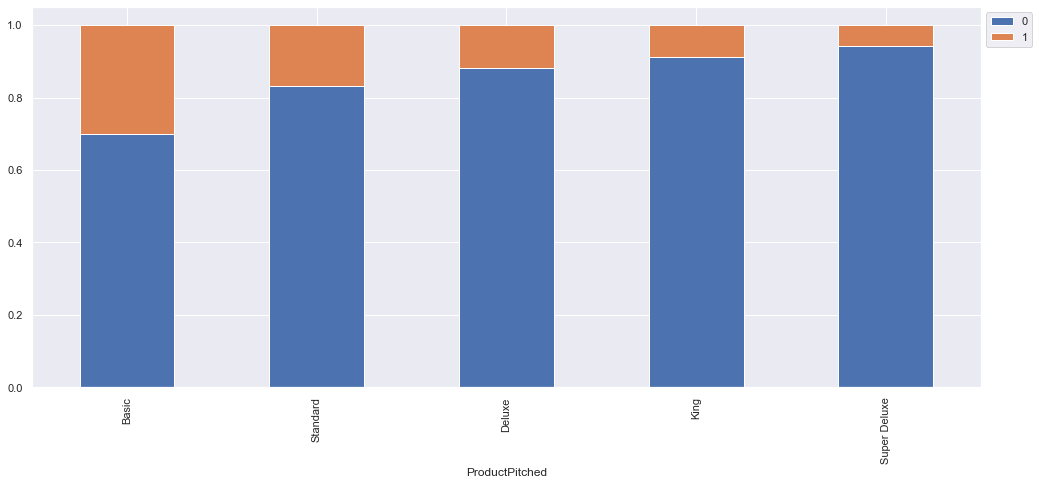

In [67]:
stacked_plot(data.ProductPitched)

- As seen earlier, the Basic product seems to attract more customers followed by standard. The higher the Product grade, the lesser the chances of the client to purchase the package

### Purchased Package vs Property Rating

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3948  914  4862
3.0                    2511  482  2993
5.0                     706  250   956
4.0                     731  182   913
------------------------------------------------------------------------------------------------------------------------


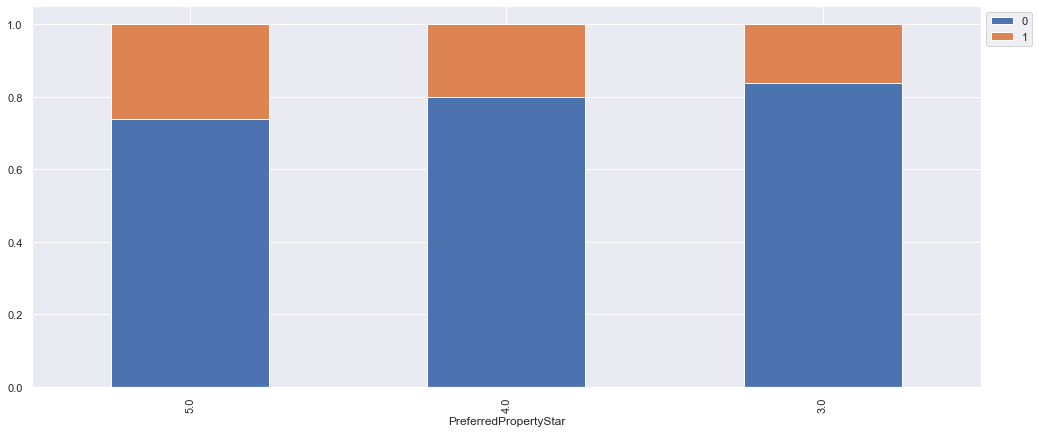

In [68]:
stacked_plot(data.PreferredPropertyStar)

- Highest rated property attracts more customers. The lower the rating, the lesser attraction or package purchased

### Purchased Package vs Marital Status

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


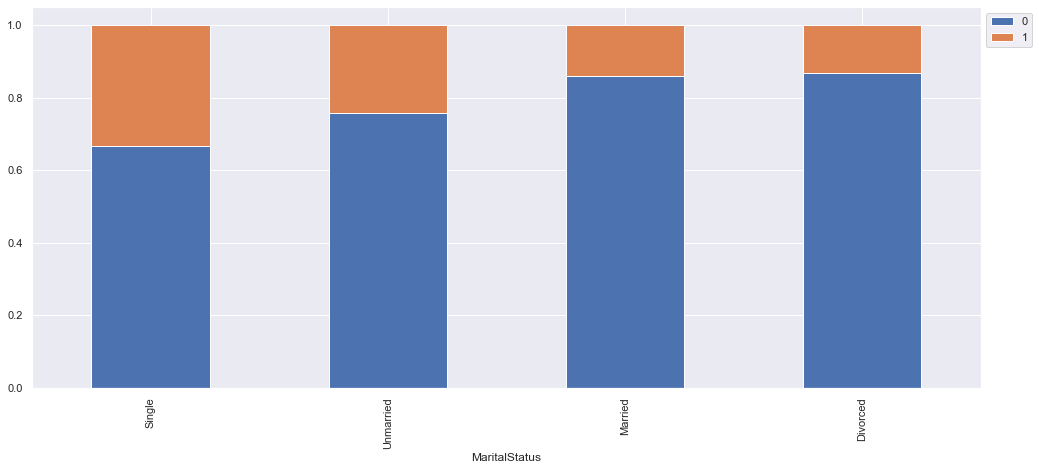

In [69]:
stacked_plot(data.MaritalStatus)

- Single folks purchased more travel package.

### Purchased Package vs Marital Status - New Feature

ProdTaken          0    1   All
Marital_Status                 
All             3968  920  4888
Single          1954  594  2548
Married         2014  326  2340
------------------------------------------------------------------------------------------------------------------------


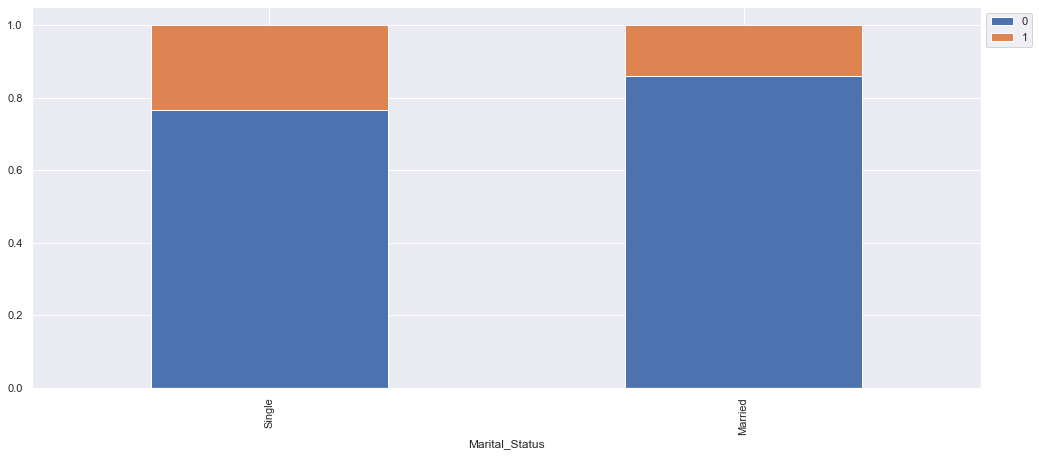

In [70]:
stacked_plot(data.Marital_Status)

- Combining Divorces, Unmarried as Single further makes the Single case. More customers that are single tend to purchase the package

### Purchased Package vs Passport

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


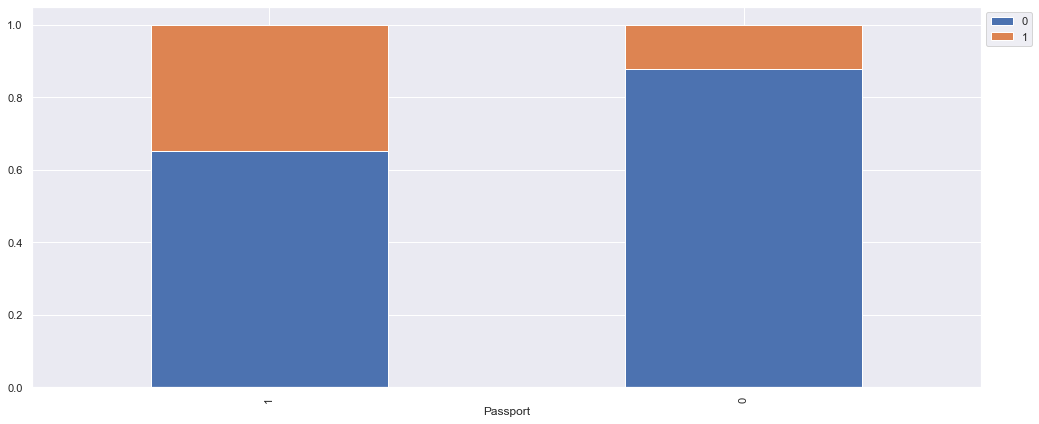

In [71]:
stacked_plot(data.Passport)

- Further drilling into the Passport, customers with Passports tend to purchase the package more which makes sense because those that travel knows the importance of having a Passport

### Purchased Package vs Pitch Satisfaction Score

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3968  920  4888
3                       1162  316  1478
5                        760  210   970
4                        750  162   912
1                        798  144   942
2                        498   88   586
------------------------------------------------------------------------------------------------------------------------


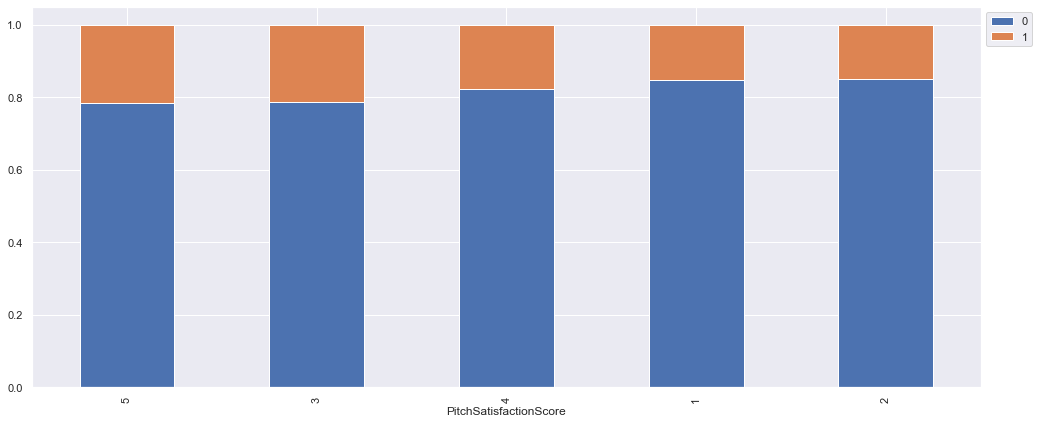

In [72]:
stacked_plot(data.PitchSatisfactionScore)

- Score of 5 and 3 were highest, followed by 4. Shows that customers that gave good review/score based on sales pitch tend to purchase the travel package

### Purchased Package vs Car Owner

ProdTaken     0    1   All
OwnCar                    
All        3968  920  4888
1          2472  560  3032
0          1496  360  1856
------------------------------------------------------------------------------------------------------------------------


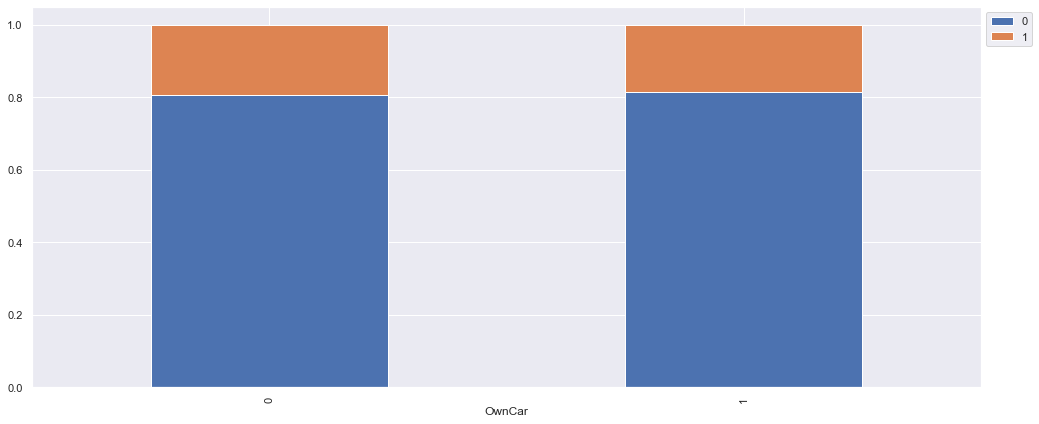

In [73]:
stacked_plot(data.OwnCar)

- There is no much difference between customers that own cars and those that doesn't and how it affects their decision in purchasing the package. Customers without cars shows slightly higher percentage however

### Purchased Package vs Designation

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


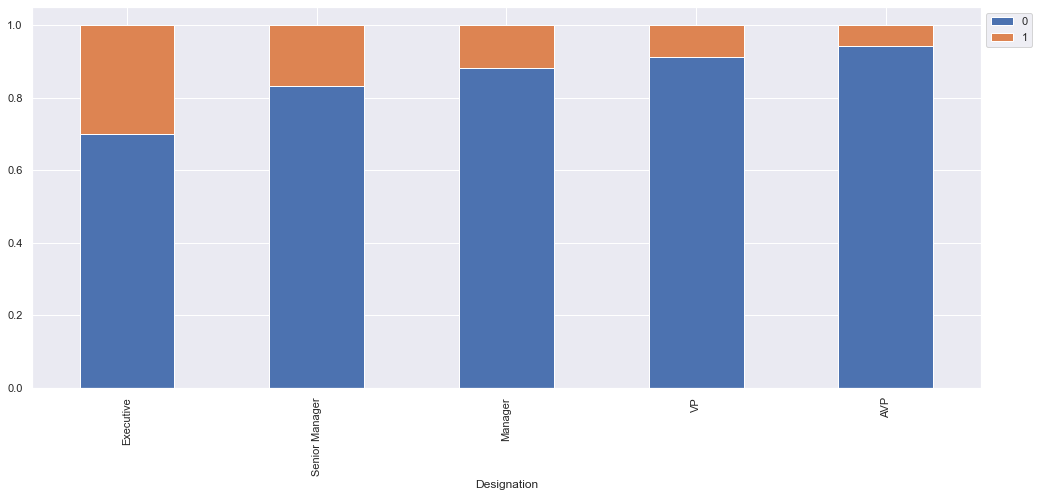

In [74]:
stacked_plot(data.Designation)

- Executives has the highest purchase of the package followed by Senior Manager.  Interesting how the VPs were the least

### <a id = "link2"></a> Data Pre-processing

- We did some feature engineering earlier by replacing `Fe Male` with `Female` 
- Also created a New Feature by combining `Divorced` and `Unmarried` together as `Single`

**Missing Values**

In [75]:
# looking at which columns have the most missing values
print('*********************** Missing Values ***********************')
print(data.isna().sum().sort_values(ascending=False))

*********************** Missing Values ***********************
DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Marital_Status                0
Gender                        0
CityTier                      0
Occupation                    0
ProductPitched                0
NumberOfPersonVisiting        0
MaritalStatus                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
Designation                   0
ProdTaken                     0
dtype: int64


In [76]:
missing_values=['DurationOfPitch','MonthlyIncome','Age','NumberOfTrips','NumberOfChildrenVisiting',
               'NumberOfFollowups','PreferredPropertyStar','TypeofContact']
data[missing_values].describe().T

,count,mean,std,min,25%,50%,75%,max
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.0,1.0,2.0,3.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0


#### Missing Values in Duration Of Pitch

In [77]:
# Replace Missing values in Duration Of Pitch with groupby Product Taken/Purchased using Mean
data['DurationOfPitch'] = data.groupby('ProdTaken').DurationOfPitch.transform(lambda x: x.fillna(x.mean()))

#### Missing Values in Monthly Income

In [78]:
# Replace Missing values in MonthlyIncome with groupby Product Taken/Purchased using Median
data['MonthlyIncome'] = data.groupby('ProdTaken').MonthlyIncome.transform(lambda x: x.fillna(x.median()))

#### Missing Values in Age

In [79]:
# Replace Missing values in Age with groupby Product Taken/Purchased using Median
data['Age'] = data.groupby('ProdTaken').Age.transform(lambda x: x.fillna(x.median()))

#### Missing Values in Number Of Trips

In [80]:
# Replace Missing values in Number Of trips with groupby Product Taken/Purchased using Median
data['NumberOfTrips'] = data.groupby('ProdTaken').NumberOfTrips.transform(lambda x: x.fillna(x.median()))

#### Missing Values in Number of Children Visiting

In [81]:
# Replace Missing values in NumberOfChildrenVisiting with groupby Product Taken/Purchased using Median
data['NumberOfChildrenVisiting'] = data.groupby('ProdTaken').NumberOfChildrenVisiting.transform(lambda x: x.fillna(x.median()))

#### Missing Values in Number of Follow Ups

In [82]:
# Replace Missing values in NumberOfFollowups with groupby Product Taken/Purchased using Median
data['NumberOfFollowups'] = data.groupby('ProdTaken').NumberOfFollowups.transform(lambda x: x.fillna(x.median()))

In [83]:
# data.describe(include=['category']).T

#### Missing Values in Preferred Property Star

In [84]:
#Convert the PreferredPropertyStar to Numeric data type
data.PreferredPropertyStar=data.PreferredPropertyStar.astype('float')

# Replace Missing values in NumberOfFollowups with groupby Product Taken/Purchased using Median
data['PreferredPropertyStar'] = data.groupby('ProdTaken').PreferredPropertyStar.transform(lambda x: x.fillna(x.median()))

#Convert the PreferredPropertyStar baack to category data type
data.PreferredPropertyStar=data.PreferredPropertyStar.astype('category')

#### Missing Values in Type of Contact

In [85]:
JJ = data.TypeofContact
JJ.isna().sum()

25

In [86]:
JJ.fillna(data.TypeofContact.mode()[0],inplace=True)

In [87]:
JJ.isna().sum()

0

In [88]:
# Replace Missing values in Type of Contact with groupby Product Taken/Purchased using Mode
data['TypeofContact'] = JJ

In [89]:
print(data.TypeofContact.value_counts())
print(data.TypeofContact.isna().sum())

Self Enquiry       3469
Company Invited    1419
Name: TypeofContact, dtype: int64
0


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4888 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   category
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   catego

### Outliers Treatment

In [91]:
cols_outliers=['DurationOfPitch','NumberOfPersonVisiting','NumberOfFollowups','NumberOfTrips'] # and Monthly Income.

# The MonthlyIncome Feature will not be treated because Income/Monetary Features are skewed in nature. We want the model
# to learn as such

#### Let's find the percentage of outliers, in each column of the data, using IQR.

In [92]:
Q1 = data[cols_outliers].quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = data[cols_outliers].quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=abs(Q1-1.5*IQR)                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [93]:
((data[cols_outliers].select_dtypes(include=['float64','int64'])<lower) | (data[cols_outliers].select_dtypes(include=['float64','int64'])
                                                            >upper)).sum()/len(data[cols_outliers])*100

DurationOfPitch           2.414075
NumberOfPersonVisiting    0.061375
NumberOfFollowups         6.382979
NumberOfTrips             2.229951
dtype: float64

In [94]:
lower

DurationOfPitch           6.0
NumberOfPersonVisiting    0.5
NumberOfFollowups         1.5
NumberOfTrips             1.0
dtype: float64

- *The percentage of outliers in Features with Outliers are neglible in the data set, however will still proceed and treat the outliers*

In [95]:
# all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
# and all the values above upper_whishker will be assigned value of upper_Whisker 
# MM = data.copy()

data[cols_outliers] = np.clip(data[cols_outliers], lower, upper,axis=1) 

In [96]:
((data[cols_outliers].select_dtypes(include=['float64','int64'])<lower) | (data[cols_outliers].select_dtypes(include=['float64','int64'])
                                                            >upper)).sum()/len(data[cols_outliers])*100

DurationOfPitch           0.0
NumberOfPersonVisiting    0.0
NumberOfFollowups         0.0
NumberOfTrips             0.0
dtype: float64

In [97]:
data[cols_outliers].describe().T

,count,mean,std,min,25%,50%,75%,max
DurationOfPitch,4888.0,15.421885,7.920218,6.0,9.0,14.0,19.0,34.0
NumberOfPersonVisiting,4888.0,2.904767,0.724109,1.0,2.0,3.0,3.0,4.5
NumberOfFollowups,4888.0,3.715221,0.922580,1.5,3.0,4.0,4.0,5.5
NumberOfTrips,4888.0,3.197218,1.704235,1.0,2.0,3.0,4.0,7.0


<AxesSubplot:xlabel='NumberOfTrips'>

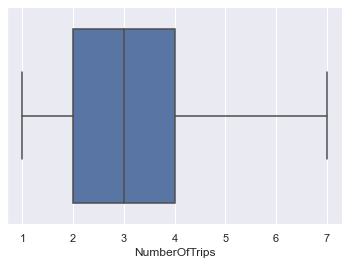

In [98]:
sns.boxplot(data.NumberOfTrips)

### <a id = "link5"></a> Model Building


**Summarizing our initial goal:**

*Build a model that will help the marketing department and Policy Marker predict which customer is more likely to purchase the newly introduced travel package*

*Objective*

1. To predict whether a  customer will buy a travel package or or not.
2. Which variables are most significant.


**Model can make wrong predictions by:**
- Predicting a customer will purchase the travel package and they `DID NOT - False Positive` - Loss of opportunity
- Predicting a customer will `NOT` purchase the travel package and they `DID - False Negative` - Loss of resources

Based on the company's objectives, we want to `increase` number of customers that will buy package after predicting they will and also reduce the number that will be predicted not to and enventually sign up. Hence, `Precision` seems to have more weight
- The `Recall` and `Precision` will be used as a metric for our model performance. Hence the `F1-Score` will be used to help check the model performance. All three metrics will be reviewed.

#### Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Build model on the train data.
4. Tune the model.
5. Test the data on test set.

#### Data Preparation

- As seen earlier, the Dependent Variable, `ProdTaken`, shows some skewness in the percentage of yes versus no. We will use `stratify` and `class-weights` as needed to help keep the bias in check

In [99]:
X = data.drop(['ProdTaken','MaritalStatus'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = data['ProdTaken']

In [100]:
X.head()

,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome,TypeofContact_Self Enquiry,CityTier_2,CityTier_3,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Male,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,PreferredPropertyStar_4.0,PreferredPropertyStar_5.0,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Passport_1,PitchSatisfactionScore_2,PitchSatisfactionScore_3,PitchSatisfactionScore_4,PitchSatisfactionScore_5,OwnCar_1,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,Marital_Status_Single
0,41.0,6.0,3.0,3.0,1.0,0.0,20993.0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1
1,49.0,14.0,3.0,4.0,2.0,2.0,20130.0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1
2,37.0,8.0,3.0,4.0,7.0,0.0,17090.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1
3,33.0,9.0,2.0,3.0,2.0,1.0,17909.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1
4,37.0,8.0,2.0,3.0,1.0,0.0,18468.0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1


In [101]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(3421, 34) (1467, 34)


In [102]:
# checking the % of yes (1) vs No (0) in the Dependent Variable to help setup class_weight
y.value_counts(1)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

#### Metric and Confusion Matrix Functions 

In [103]:
##  Function to calculate recall score
def get_recall_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [104]:
##  Function to calculate precision score
def get_precision_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [105]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [106]:
##  Function to calculate f1 score
def get_f1_score(model,flag=True):
    '''
     model : classifier to predict values of X

    '''
    d = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)
    d.append(train_f1) # adding train f1 to list
    d.append(test_f1) # adding test f1 to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("F1_Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1_Score on test set : ",metrics.f1_score(y_test,pred_test))

    return d # returning the list with train and test scores

In [107]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### <a id = "link6"></a> Bagging - DecisionTree, BaggingClassifier, RandomForest

#### Decision Tree Model
- From the Data split, we saw that the y feature had a 81% - 0, and 19% - 1. We will use class_weight in the model

In [108]:
# 0    0.811784
# 1    0.188216
# Create DecisionTree Model

DTree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1)

In [109]:
# Train Model

DTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

In [110]:
DTree.get_params() # view the default values used in the hyperparameters help have an idea of what range of values to use
# when it is time to tune

{'ccp_alpha': 0.0,
 'class_weight': {0: 0.19, 1: 0.81},
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 1,
 'splitter': 'best'}

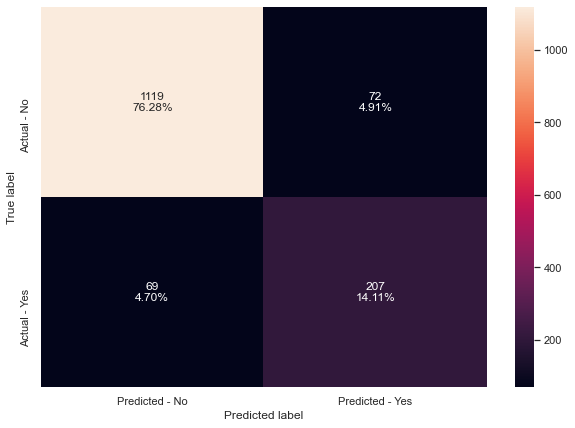

In [111]:
# Confusion Matrix for Decision Tree Model
make_confusion_matrix(DTree,y_test)

**Confusion Matrix Summary-**

* Customer bought package and the model predicted it correctly that customer will purchase :  True Positive (observed=1,predicted=1)

* Customer didn't buy package and the model predicted customer will buy : False Positive (observed=0,predicted=1)

* Customer didn't buy and the model predicted customer will not buy : True Negative (observed=0,predicted=0)

* Customer didn't buy and the model predicted that customer will buy : False Negative (observed=1,predicted=0)

- Model predicted that 14% of the customer will purchase the package
- 76% will not purchase the package

In [112]:
DTree_acc = get_accuracy_score(DTree)
DTree_recall = get_recall_score(DTree)
DTree_precision = get_precision_score(DTree)
DTree_f1 = get_f1_score(DTree)

Accuracy on training set :  1.0
Accuracy on test set :  0.9038854805725971
Recall on training set :  1.0
Recall on test set :  0.75
Precision on training set :  1.0
Precision on test set :  0.7419354838709677
F1_Score on training set :  1.0
F1_Score on test set :  0.7459459459459459


- DecisionTree Model performs well on the training data but still not generalizing well on the test data concerning the Precision and Recall.

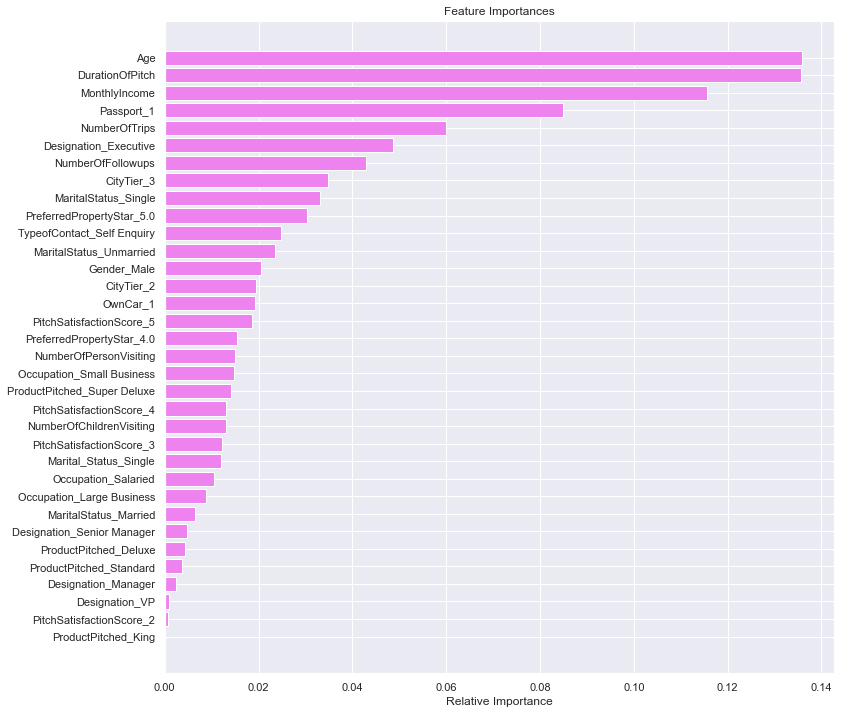

In [113]:
feature_names = X_train.columns
importances = DTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Using the Decision Tree Model shows that
Age is the most important feature, followed by Duration of Pitch, Monthly Income and Passport 

#### BaggingClassifier Model

In [114]:
# Create BaggingClassifier Model

bag = BaggingClassifier(random_state=1)
bag.fit(X_train,y_train)

BaggingClassifier(random_state=1)

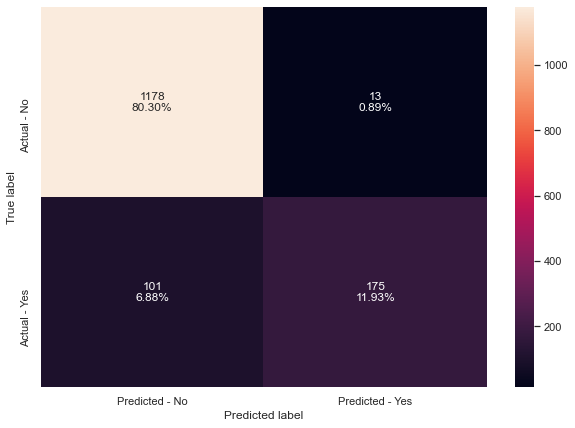

In [115]:
# Confusion Matrix for BaggingClassifier with default base estimator and not class weights
make_confusion_matrix(bag,y_test)

In [116]:
bag_acc = get_accuracy_score(bag)
bag_recall = get_recall_score(bag)
bag_precision = get_precision_score(bag)
bag_f1 = get_f1_score(bag)

Accuracy on training set :  0.9944460684010523
Accuracy on test set :  0.9222903885480572
Recall on training set :  0.9736024844720497
Recall on test set :  0.6340579710144928
Precision on training set :  0.9968203497615262
Precision on test set :  0.9308510638297872
F1_Score on training set :  0.9850746268656716
F1_Score on test set :  0.7543103448275862


- BaggingClassifier is performing better than the DecisionTree Model. Although still overfitting to the training data.  Precision for both the training and testing data looks better compared to the DecisionTree. The Recall however is still overfitted to the training data.
- F1 Score also improved

#### BaggingClassifier Model using DecisionTree as base estimator to apply weights

In [117]:
# Create BaggingClassifier Model with weighted DecisionTree
#Weights:
    # 0    0.811784
    # 1    0.188216

bag_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',
                                random_state=1,class_weight={0:0.19,1:0.81}),random_state=1)
bag_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        random_state=1),
                  random_state=1)

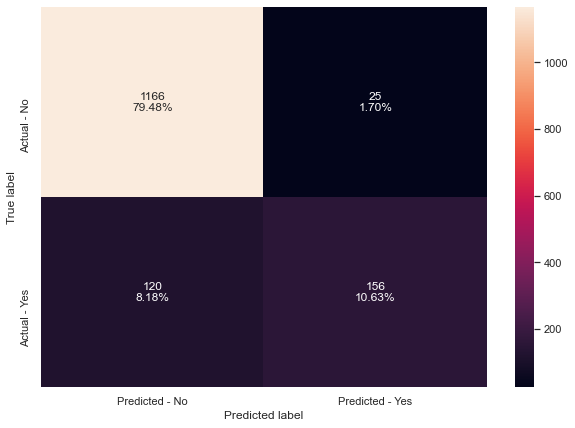

In [118]:
## Confusion Tree for Weighted BaggingClassifier

make_confusion_matrix(bag_wt,y_test)

In [119]:
bag_wt_acc = get_accuracy_score(bag_wt)
bag_wt_recall = get_recall_score(bag_wt)
bag_wt_precision = get_precision_score(bag_wt)
bag_wt_f1 = get_f1_score(bag_wt)

Accuracy on training set :  0.9926921952645426
Accuracy on test set :  0.9011588275391956
Recall on training set :  0.9658385093167702
Recall on test set :  0.5652173913043478
Precision on training set :  0.9952
Precision on test set :  0.861878453038674
F1_Score on training set :  0.9802994483845549
F1_Score on test set :  0.6827133479212254


- The BaggingClassifier with Default parameters seems to perform better than the weighted BaggingClassifier
- Accuracy also dropped on the test data
- The Precision has reduced, which is more realistic, however the Recall dropped. The F1 score also reduced and still overfitting to the training data

#### RandomForest Model

In [120]:
# Create RandomForest Model

random = RandomForestClassifier(random_state=1)
random.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

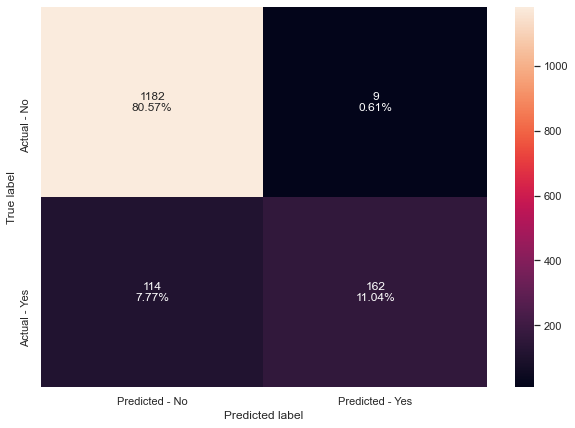

In [121]:
make_confusion_matrix(random,y_test)

In [122]:
random_acc = get_accuracy_score(random)
random_recall = get_recall_score(random)
random_precision = get_precision_score(random)
random_f1 = get_f1_score(random)

Accuracy on training set :  1.0
Accuracy on test set :  0.9161554192229039
Recall on training set :  1.0
Recall on test set :  0.5869565217391305
Precision on training set :  1.0
Precision on test set :  0.9473684210526315
F1_Score on training set :  1.0
F1_Score on test set :  0.7248322147651006


- Model is overfitting to the training data. Doing a good job with training but poorly with test data
- Precision is high, but model still overfitting. Recall is low. F1 is average, but all still overfits to the training data

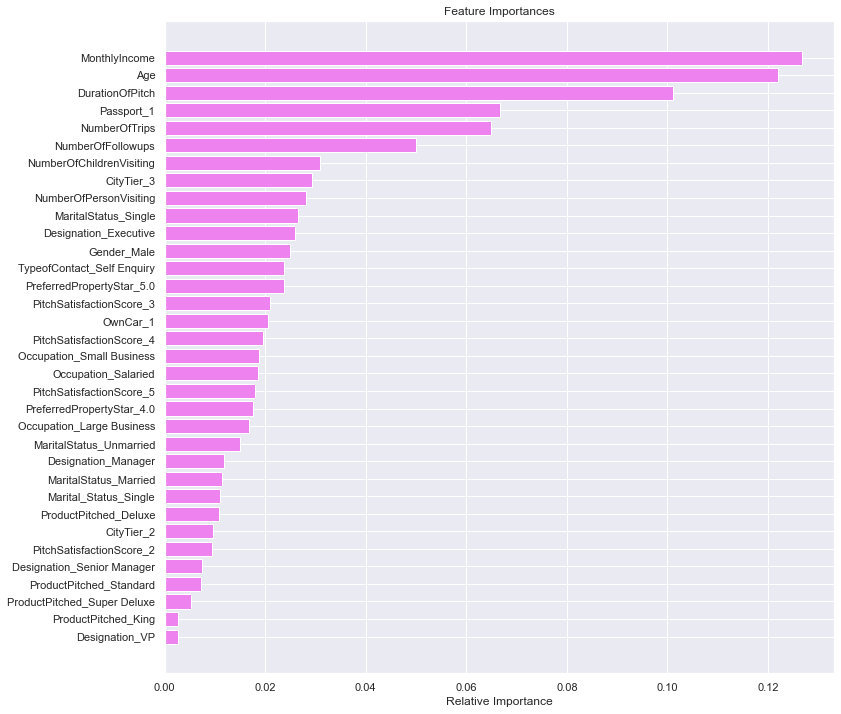

In [123]:
feature_names = X_train.columns
importances = random.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Using the RandomForest Model shows that
Monthly Income is the most important feature, followed by Age, Duration of Pitch,  and Passport. 
- It swapped Age and Income when compared to the DecitionTree model

#### RandomForest Model using weights

In [124]:
# Create RandomForest Model weighted 
#Weights:
    # 0    0.811784
    # 1    0.188216

random_wt = RandomForestClassifier(class_weight={0:0.19,1:0.81},random_state=1)
random_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

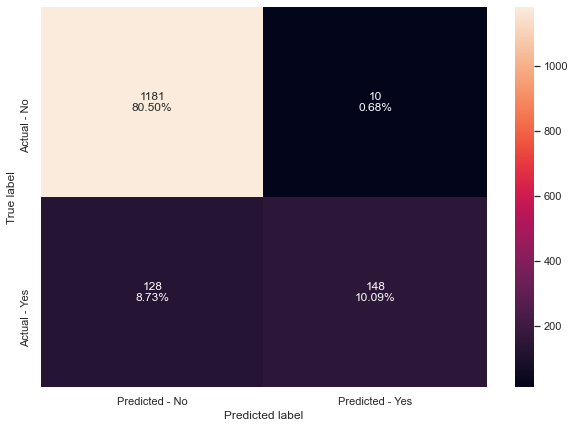

In [125]:
make_confusion_matrix(random_wt,y_test)

In [126]:
random_wt_acc = get_accuracy_score(random_wt)
random_wt_recall = get_recall_score(random_wt)
random_wt_precision = get_precision_score(random_wt)
random_wt_f1 = get_f1_score(random_wt)

Accuracy on training set :  1.0
Accuracy on test set :  0.9059304703476483
Recall on training set :  1.0
Recall on test set :  0.5362318840579711
Precision on training set :  1.0
Precision on test set :  0.9367088607594937
F1_Score on training set :  1.0
F1_Score on test set :  0.6820276497695852


- No much difference in the model performance comparing the unweighted RandomForest to the weighted RandomForest
- Model still overfitting to the training data

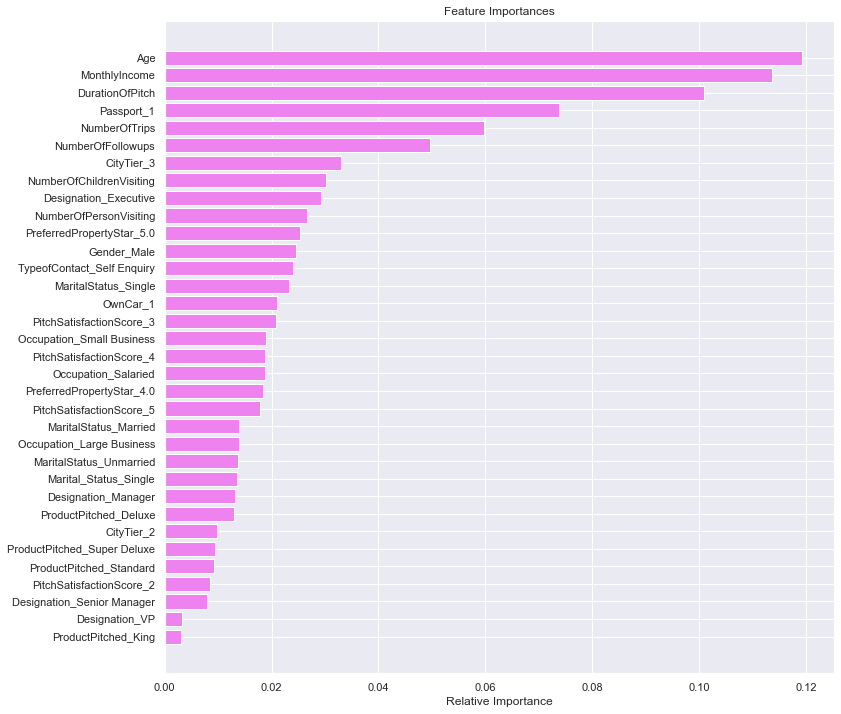

In [127]:
feature_names = X_train.columns
importances = random_wt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Most Important features are still retained when the RandomForest Model is weighted

### Model Tuning - Using GridSearch for Hyperparameter

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

Tuning:
- Start with wide gaps between inputs
- Run GridSearchCV (1st time)
- Choose values near the selected values at step 2 - run gridsearchCV again (2nd time)

#### Tuning Decision Tree

In [128]:
# let's view the default parameters from the Untuned DecisionTree
DTree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': {0: 0.19, 1: 0.81},
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 1,
 'splitter': 'best'}

In [129]:
X.shape

(4888, 34)

In [130]:
# Choose the type of classifier. 
DTree_tune = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)

# Grid of parameters to choose from
#1. First iteration parameters:
parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [2, 5, 8, 10,15],
              'max_leaf_nodes' : [10,15,20,25],
              'min_impurity_decrease': [0.00001,0.0001,0.001,0.01],
             }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(DTree_tune, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the DTree_tune to the best combination of parameters
DTree_tune = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
DTree_tune.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=3,
                       max_leaf_nodes=10, min_impurity_decrease=1e-05,
                       min_samples_leaf=2, random_state=1)

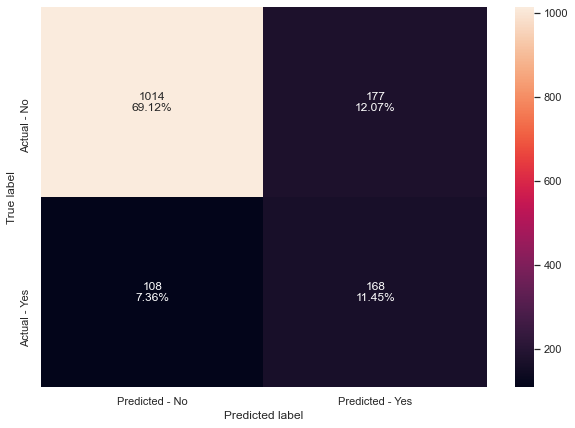

In [131]:
make_confusion_matrix(DTree_tune,y_test)

In [132]:
DTree_tune_acc = get_accuracy_score(DTree_tune)
DTree_tune_recall = get_recall_score(DTree_tune)
DTree_tune_precision = get_precision_score(DTree_tune)
DTree_tune_f1 = get_f1_score(DTree_tune)

Accuracy on training set :  0.7831043554516224
Accuracy on test set :  0.8057259713701431
Recall on training set :  0.5869565217391305
Recall on test set :  0.6086956521739131
Precision on training set :  0.4426229508196721
Precision on test set :  0.48695652173913045
F1_Score on training set :  0.5046728971962617
F1_Score on test set :  0.5410628019323672


- The overfitting has reduced, so has Precision, Recall, and F1 score

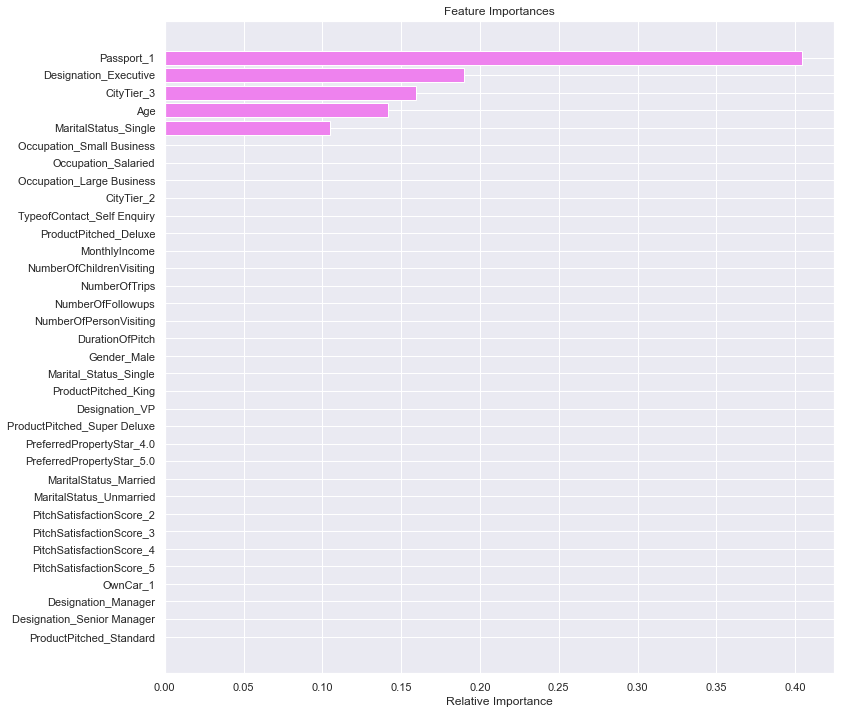

In [133]:
feature_names = X_train.columns
importances = DTree_tune.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Tuned DecisionTree Model is now giving Passport as the mos important Feature which is interesting however we do know that the metrics results are not great

#### Tuning BaggingClassifier

In [134]:
# let's view the default parameters from the Untuned BaggingClassifier
bag.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [135]:
# grid search for bagging classifier
base_estimator = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1,max_depth=4)
param_grid = {'base_estimator':[base_estimator],
              'n_estimators':[130,140,150,180],
              'max_features': [0.3,0.4,0.6,0.8,1],
              }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'f1', cv = 5,n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1), n_jobs=-1,
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={0: 0.19,
                                                                                 1: 0.81},
                                                                   max_depth=4,
                                                                   random_state=1)],
                         'max_features': [0.3, 0.4, 0.6, 0.8, 1],
                         'n_estimators': [130, 140, 150, 180]},
             scoring='f1')

In [136]:
## getting the best estimator
bag_tuned  = grid.best_estimator_
bag_tuned.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        max_depth=4,
                                                        random_state=1),
                  max_features=0.6, n_estimators=130, random_state=1)

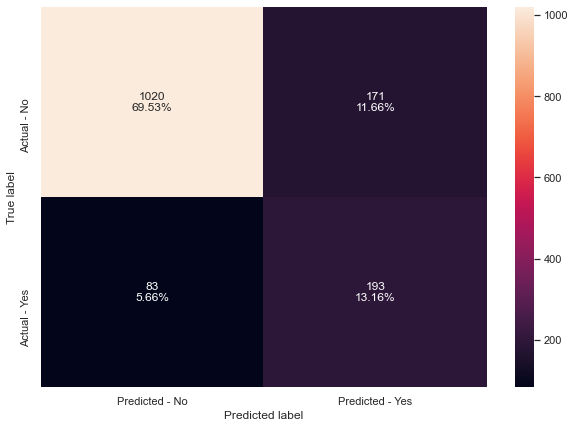

In [137]:
make_confusion_matrix(bag_tuned,y_test)

In [138]:
bag_tune_acc = get_accuracy_score(bag_tuned)
bag_tune_recall = get_recall_score(bag_tuned)
bag_tune_precision = get_precision_score(bag_tuned)
bag_tune_f1 = get_f1_score(bag_tuned)

Accuracy on training set :  0.8289973691902952
Accuracy on test set :  0.8268575323790047
Recall on training set :  0.6940993788819876
Recall on test set :  0.6992753623188406
Precision on training set :  0.5353293413173653
Precision on test set :  0.5302197802197802
F1_Score on training set :  0.6044624746450304
F1_Score on test set :  0.6031249999999999


- Overfitting has reduced, however we need to get the Precision, Recall and F1 performance up so the model can better predict the test data

#### Tuning RandomForest

In [139]:
# let's view the default parameters from the Untuned RandomForest
random.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [140]:
# Choose the type of classifier. 
# There was not much difference between the RandomForest with and without weights. However, we will still use the weights

random_tuned = RandomForestClassifier(class_weight={0:0.19,1:0.81},random_state=1)

# Grid of parameters to choose from
parameters = {  
        'max_depth':[4, 6, 8, 10, None],
        "n_estimators": [100,200,250,500],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": ['log2','auto',None],
        "max_samples": [0.8,0.9,None],
        }


# Run the grid search
grid_obj = GridSearchCV(random_tuned, parameters, scoring='f1',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the random_tuned to the best combination of parameters
random_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
random_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_features=None,
                       min_samples_leaf=2, n_estimators=200, random_state=1)

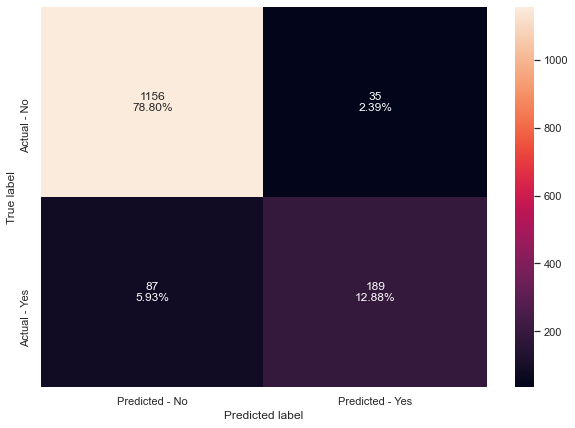

In [141]:
make_confusion_matrix(random_tuned,y_test)

In [142]:
random_tune_acc = get_accuracy_score(random_tuned)
random_tune_recall = get_recall_score(random_tuned)
random_tune_precision = get_precision_score(random_tuned)
random_tune_f1 = get_f1_score(random_tuned)

Accuracy on training set :  0.9976615024846536
Accuracy on test set :  0.9168370824812543
Recall on training set :  1.0
Recall on test set :  0.6847826086956522
Precision on training set :  0.9877300613496932
Precision on test set :  0.84375
F1_Score on training set :  0.9938271604938271
F1_Score on test set :  0.7559999999999999


- The tuned RandomForest with weights 

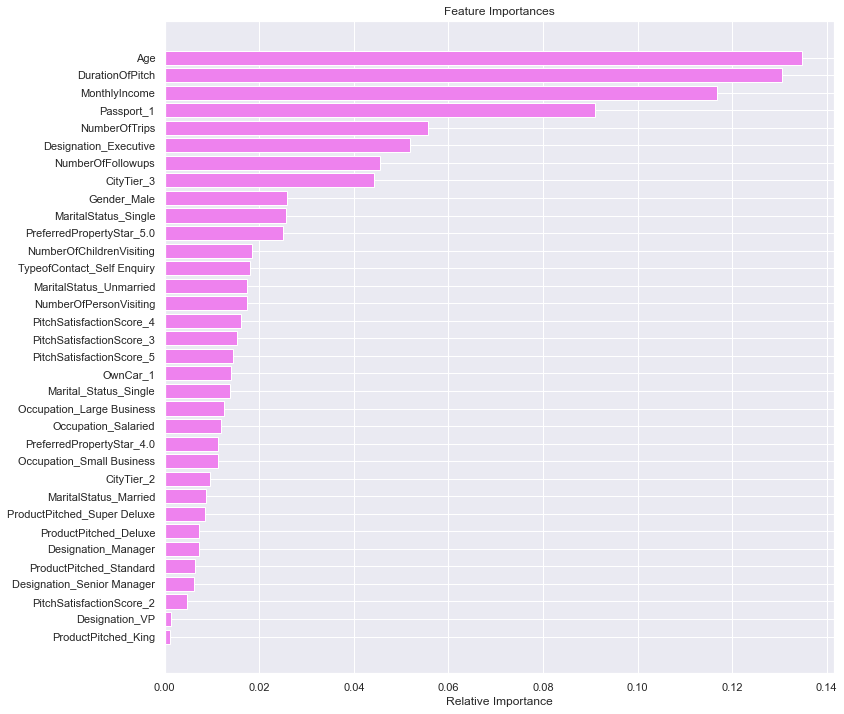

In [143]:
feature_names = X_train.columns
importances = random_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Still retaining the original most important features from the pre-tuned Model

### <a id = "link7"></a> Boosting - AdaBoost, GradientBoost, XGBoost

#### AdaBoostClassifier Model

In [144]:
# Create AdaBoost Model

ab_c = AdaBoostClassifier(random_state=1)
ab_c.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

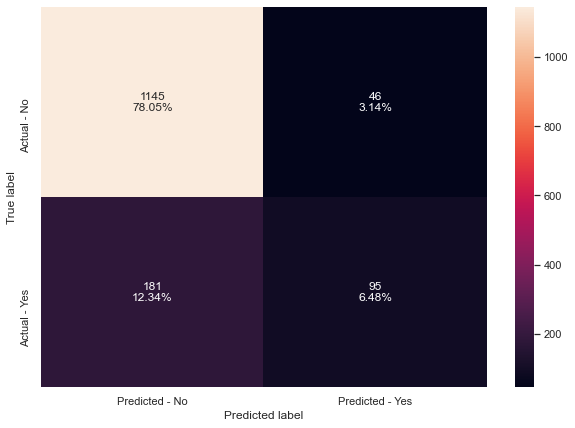

In [145]:
make_confusion_matrix(ab_c,y_test)

In [146]:
ab_c_acc = get_accuracy_score(ab_c)
ab_c_recall = get_recall_score(ab_c)
ab_c_precision = get_precision_score(ab_c)
ab_c_f1 = get_f1_score(ab_c)

Accuracy on training set :  0.8550131540485238
Accuracy on test set :  0.8452624403544649
Recall on training set :  0.3695652173913043
Recall on test set :  0.3442028985507246
Precision on training set :  0.725609756097561
Precision on test set :  0.6737588652482269
F1_Score on training set :  0.4897119341563786
F1_Score on test set :  0.4556354916067146


- Definitely not overfitting the previous models before tuning, however the model is not performing well in predicting the test data. The Precision, Recall, and F1 are all still low

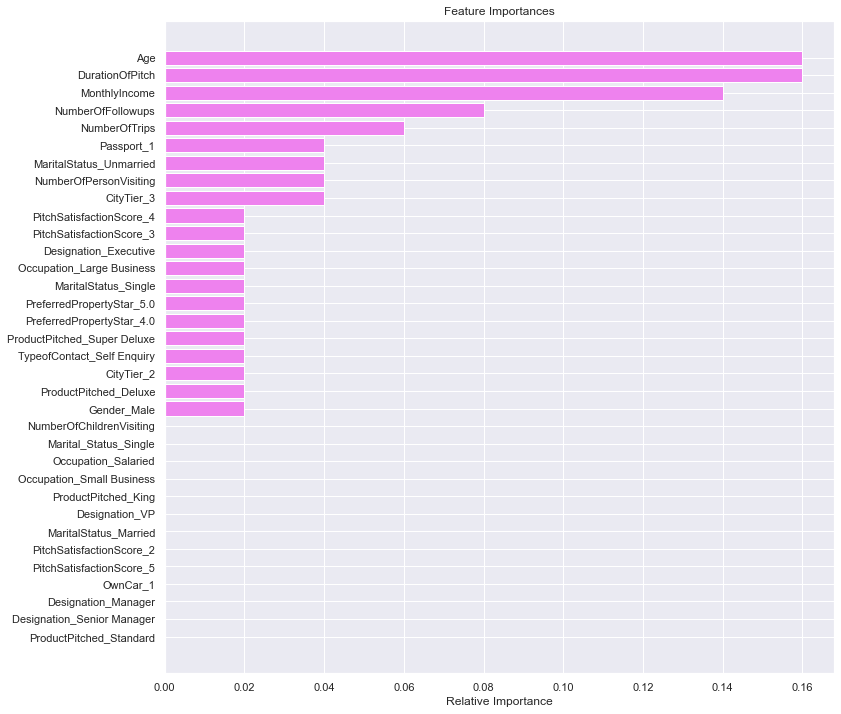

In [147]:
feature_names = X_train.columns
importances = ab_c.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Showing similar important features as the RandomForest Model

#### Gradient Boosting Classifier Model

In [148]:
#build gradient boost model

gb_c=GradientBoostingClassifier(random_state=1)
gb_c.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

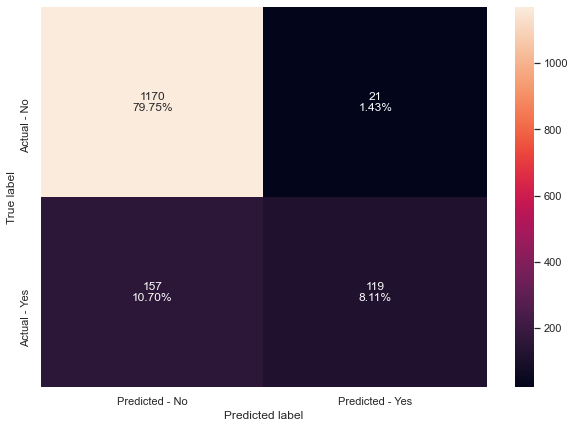

In [149]:
make_confusion_matrix(gb_c,y_test)

In [150]:
gb_c_acc = get_accuracy_score(gb_c)
gb_c_recall = get_recall_score(gb_c)
gb_c_precision = get_precision_score(gb_c)
gb_c_f1 = get_f1_score(gb_c)

Accuracy on training set :  0.895352236188249
Accuracy on test set :  0.8786639400136332
Recall on training set :  0.4953416149068323
Recall on test set :  0.4311594202898551
Precision on training set :  0.90625
Precision on test set :  0.85
F1_Score on training set :  0.6405622489959839
F1_Score on test set :  0.5721153846153847


- GradientBoost is generalizing well, hopefully we get a better model after tuning

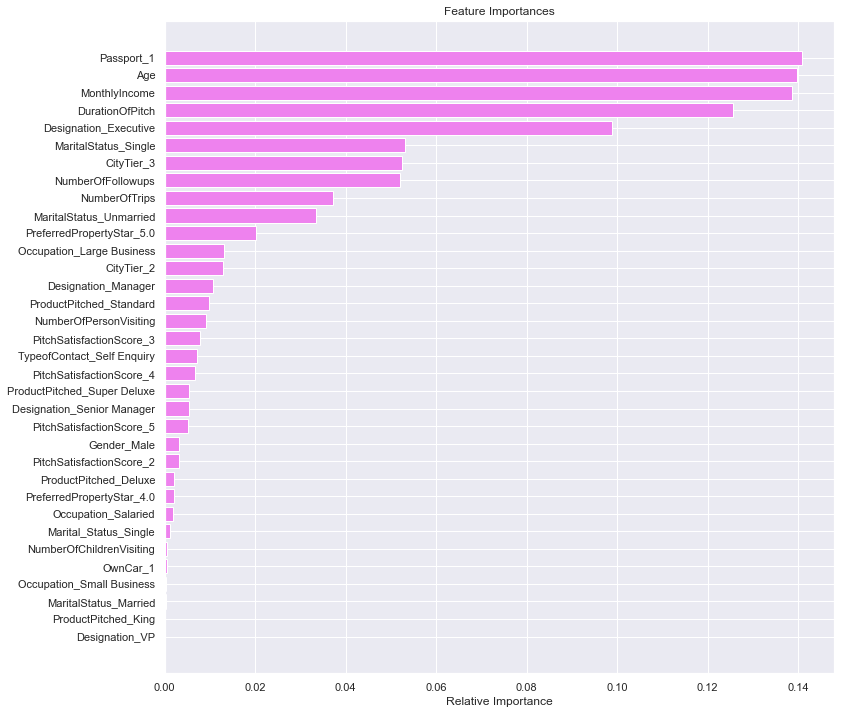

In [151]:
feature_names = X_train.columns
importances = gb_c.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Gradient Boost showing passport as the most important feature. We saw similar result with DecisionTree model previously

#### XGBoost Classifier Model

In [152]:
# build XGBoost model

xgb_c=XGBClassifier(random_state=1)
xgb_c.fit(X_train,y_train)

[07:08:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

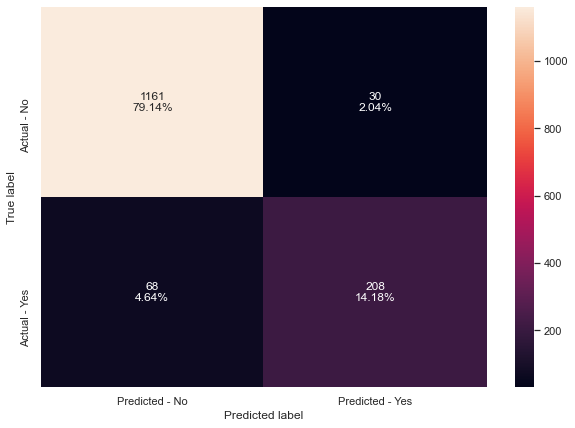

In [153]:
make_confusion_matrix(xgb_c,y_test)

In [154]:
xgb_c_acc = get_accuracy_score(xgb_c)
xgb_c_recall = get_recall_score(xgb_c)
xgb_c_precision = get_precision_score(xgb_c)
xgb_c_f1 = get_f1_score(xgb_c)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9331970006816632
Recall on training set :  0.9984472049689441
Recall on test set :  0.7536231884057971
Precision on training set :  1.0
Precision on test set :  0.8739495798319328
F1_Score on training set :  0.9992229992229993
F1_Score on test set :  0.8093385214007781


- XGBoost model is performing well but shows overfitting in the training data on Precision

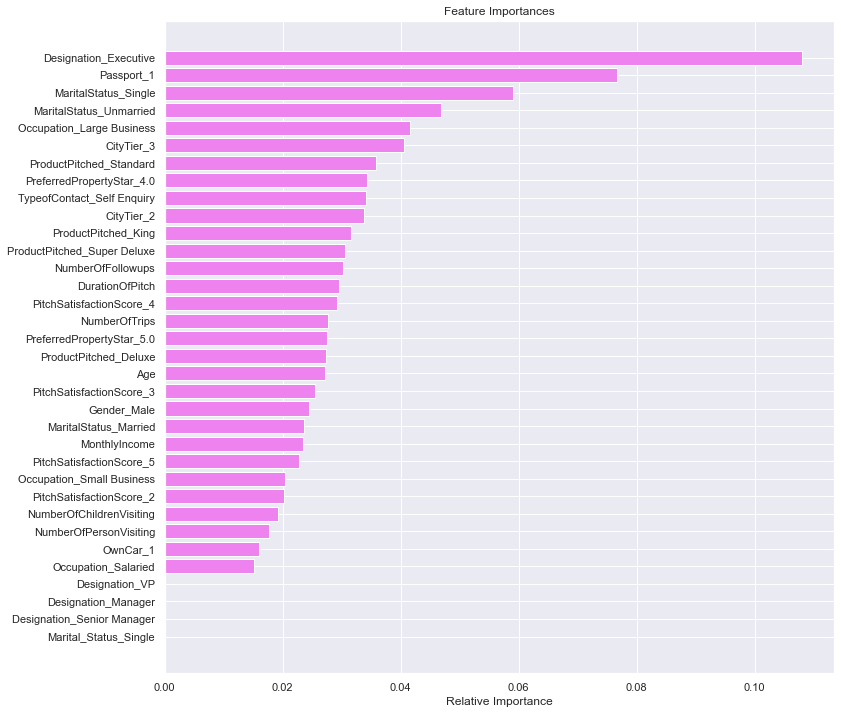

In [155]:
feature_names = X_train.columns
importances = xgb_c.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- XGBoost is predicting that Designature is the most important feature, followed by Passport, and Marital Status

### Tuning Models - AdaBoost, Gradient Boost, XGBoost 


#### Tuning AdaBoost

In [192]:
# preview original parameters without tuning

ab_c.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 1}

In [156]:
# Choose the type of classifier. 
ab_c_tuned = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1
                                                            ,max_depth=4),random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,100,10), 
              'learning_rate': [1,0.8, 0.2, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(ab_c_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_c_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_c_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                       1: 0.81},
                                                         max_depth=4,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=80, random_state=1)

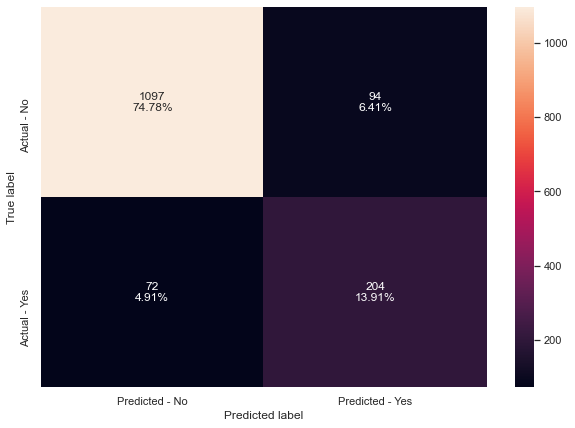

In [157]:
# ab_c_tuned.get_params()

make_confusion_matrix(ab_c_tuned,y_test)

In [158]:
ab_c_tuned_acc = get_accuracy_score(ab_c_tuned)
ab_c_tuned_recall = get_recall_score(ab_c_tuned)
ab_c_tuned_precision = get_precision_score(ab_c_tuned)
ab_c_tuned_f1 = get_f1_score(ab_c_tuned)

Accuracy on training set :  0.9777842736042093
Accuracy on test set :  0.8868438991138378
Recall on training set :  0.9891304347826086
Recall on test set :  0.7391304347826086
Precision on training set :  0.9022662889518414
Precision on test set :  0.6845637583892618
F1_Score on training set :  0.9437037037037036
F1_Score on test set :  0.710801393728223


- After tuning the Adaboost model and also adjusting the max_depth in the base_estimator the best model was achieved with a max_depth of 4 and along with the other hyperparameters from the GridSearch
- The tuned Adaboost is performing better, less overfitting and better prediction with the test data

In [159]:
print(pd.DataFrame(ab_c_tuned.feature_importances_, columns = ["Imp"], index = 
                   X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
MonthlyIncome             0.255813
Age                       0.156136
DurationOfPitch           0.102257
NumberOfTrips             0.057374
Passport_1                0.040129
...                            ...
MaritalStatus_Married     0.003466
Marital_Status_Single     0.002551
PitchSatisfactionScore_2  0.001920
ProductPitched_King       0.000903
Designation_VP            0.000037

[34 rows x 1 columns]


- Tuned Adaboost model is showing MonthlyIncome as the most important feature followed by Age

#### Tuning Gradient Boost

In [160]:
# preview original parameters without tuning

gb_c.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 1,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [162]:
# Choose the type of classifier. 
gb_c_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(100,200,50), 
              'subsample':[0.4,0.6,0.8,1],
              'max_features':[0.6,0.8,0.9,1],
              'max_depth':[3,6,8,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gb_c_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_c_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_c_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=8, max_features=0.8, n_estimators=150,
                           random_state=1, subsample=0.8)

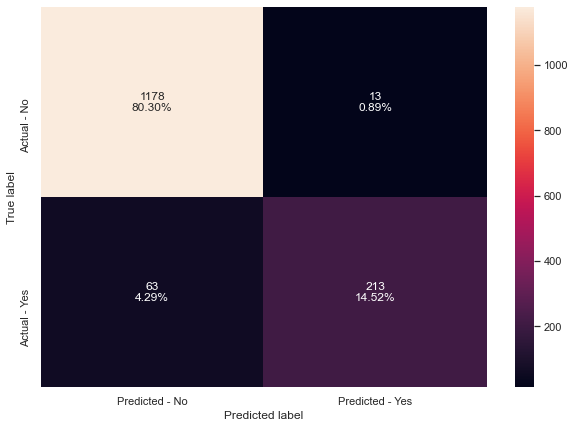

In [165]:
# ab_c_tuned.get_params()

make_confusion_matrix(gb_c_tuned,y_test)

In [166]:
gb_c_tuned_acc = get_accuracy_score(gb_c_tuned)
gb_c_tuned_recall = get_recall_score(gb_c_tuned)
gb_c_tuned_precision = get_precision_score(gb_c_tuned)
gb_c_tuned_f1 = get_f1_score(gb_c_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.9481935923653715
Recall on training set :  1.0
Recall on test set :  0.7717391304347826
Precision on training set :  1.0
Precision on test set :  0.9424778761061947
F1_Score on training set :  1.0
F1_Score on test set :  0.848605577689243


- The tuned GradientBoost is overfitting to the training data and not

#### XGBoost Tuning

In [163]:
# preview default parameters

xgb_c.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'random_state': 1,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [167]:
# Choose the type of classifier. 
xgb_c_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': [100,130,160], 
              'subsample':[0.6, 0.85, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.6, 0.8, 0.9, 1],
              'colsample_bylevel':[0.6, 0.8, 0.9, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_c_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_c_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_c_tuned.fit(X_train, y_train)

[07:50:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:50:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=130, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

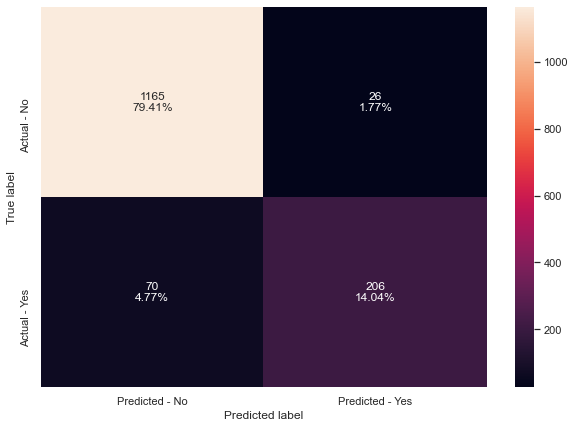

In [168]:
make_confusion_matrix(xgb_c_tuned,y_test)

In [169]:
xgb_c_tuned_acc = get_accuracy_score(xgb_c_tuned)
xgb_c_tuned_recall = get_recall_score(xgb_c_tuned)
xgb_c_tuned_precision = get_precision_score(xgb_c_tuned)
xgb_c_tuned_f1 = get_f1_score(xgb_c_tuned)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.934560327198364
Recall on training set :  0.9984472049689441
Recall on test set :  0.7463768115942029
Precision on training set :  1.0
Precision on test set :  0.8879310344827587
F1_Score on training set :  0.9992229992229993
F1_Score on test set :  0.8110236220472441


- XGBoost looks better but with some overfitting on the training data. The Metrics looks improved compared to the untuned XG

In [176]:
print(pd.DataFrame(xgb_c_tuned.feature_importances_, columns = ["Imp"], index = 
                   X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Designation_Executive      0.091920
Passport_1                 0.075023
MaritalStatus_Single       0.046270
CityTier_3                 0.044441
PreferredPropertyStar_5.0  0.037432
...                             ...
PitchSatisfactionScore_5   0.019211
OwnCar_1                   0.015730
Occupation_Salaried        0.014651
NumberOfChildrenVisiting   0.011762
Marital_Status_Single      0.011113

[34 rows x 1 columns]


### <a id = "link8"></a> Stacking Model

**We will build a stacking model with the tuned models: - DecisionTree, BaggingClassifier, RandomForest, AdaBoost and GradientBoosting, then use XGBoost to get the final estimation.**

In [172]:
stacked_models=[('Decision Tree', DTree_tune),('BaggingClassifier', bag_tuned),('Random Forest', random_tuned),
          ('AdaBoost', ab_c_tuned),('Gradient Boosting', gb_c_tuned)]
final_estimator = XGBClassifier(random_state=1)

In [173]:
stacking = StackingClassifier(estimators=stacked_models, final_estimator=final_estimator,cv=5,n_jobs=-1)
stacking.fit(X_train,y_train)

[07:53:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.19,
                                                                     1: 0.81},
                                                       max_depth=3,
                                                       max_leaf_nodes=10,
                                                       min_impurity_decrease=1e-05,
                                                       min_samples_leaf=2,
                                                       random_state=1)),
                               ('BaggingClassifier',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                                                      1: 0.81},
                                                                                        max_depth=4,
                  

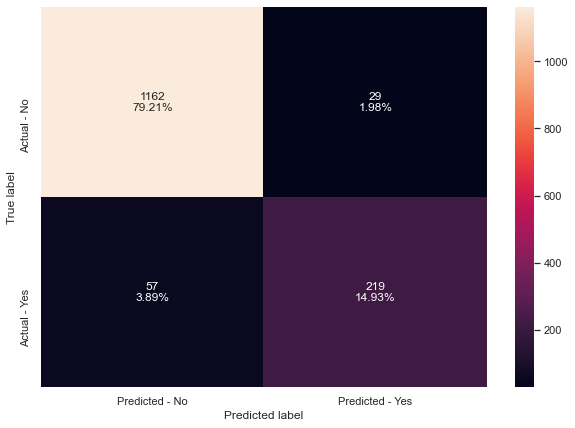

In [175]:
make_confusion_matrix(stacking,y_test)

In [174]:
stacking_acc = get_accuracy_score(stacking)
stacking_recall = get_recall_score(stacking)
stacking_precision = get_precision_score(stacking)
stacking_f1 = get_f1_score(stacking)

Accuracy on training set :  0.9994153756211634
Accuracy on test set :  0.9413769597818678
Recall on training set :  1.0
Recall on test set :  0.7934782608695652
Precision on training set :  0.9969040247678018
Precision on test set :  0.8830645161290323
F1_Score on training set :  0.9984496124031007
F1_Score on test set :  0.8358778625954199


- Stacking Model is generalizing the test data better than most of the other models

### <a id = "link9"></a> Model Comparison

In [179]:
# defining list of models
models = [DTree,DTree_tune,bag,bag_wt,bag_tuned,random,random_wt,random_tuned,ab_c,ab_c_tuned,gb_c,gb_c_tuned,xgb_c,
         xgb_c_tuned,stacking]

  
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the accuracy,recall, precision and f1 scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])
    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])
    # f1 score
    m = get_f1_score(model,False)
    f1_train.append(m[0])
    f1_test.append(m[1])

In [182]:
model_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Bagging Classifier',
                                          'Weighted Bagging Classifier','Tuned Bagging Classifier',
                                          'Random Forest','Weighted Random Forest','Tuned Random Forest',
                                           'AdaBoost Classifier','Tuned AdaBoost Classifier',
                                          'Gradient Classifier','Tuned Graidient Classifier',
                                           'XGBoost Classifier','Tuned XGBoost Classifier','Stacking'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test,
                                          'Train_f1': f1_train,
                                          'Test_f1': f1_test}) 
model_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_f1,Test_f1
0,Decision Tree,1.000000,0.903885,1.000000,0.750000,1.000000,0.741935,1.000000,0.745946
1,Tuned Decision Tree,0.783104,0.805726,0.586957,0.608696,0.442623,0.486957,0.504673,0.541063
2,Bagging Classifier,0.994446,0.922290,0.973602,0.634058,0.996820,0.930851,0.985075,0.754310
3,Weighted Bagging Classifier,0.992692,0.901159,0.965839,0.565217,0.995200,0.861878,0.980299,0.682713
4,Tuned Bagging Classifier,0.828997,0.826858,0.694099,0.699275,0.535329,0.530220,0.604462,0.603125
5,Random Forest,1.000000,0.916155,1.000000,0.586957,1.000000,0.947368,1.000000,0.724832
6,Weighted Random Forest,1.000000,0.905930,1.000000,0.536232,1.000000,0.936709,1.000000,0.682028
7,Tuned Random Forest,0.997662,0.916837,1.000000,0.684783,0.987730,0.843750,0.993827,0.756000
8,AdaBoost Classifier,0.855013,0.845262,0.369565,0.344203,0.725610,0.673759,0.489712,0.455635
9,Tuned AdaBoost Classifier,0.977784,0.886844,0.989130,0.739130,0.902266,0.684564,0.943704,0.710801


Using `f1_Score` as the main metric in selection:
- The Stacked Model performed well on the training and test 
- The Tuned XGBoost comes second in performance on both the training and test data
- Random Forest and Tuned Random Forest does not show much difference after tunning
- Tuned Bagging and Tuned Decision Tree Models both dropped in performance after tunning, all the other Models improved after tunning
- Lower performing models could probably be improved with further tuning

### Feature Importance of Tuned XGBoost and Stacking

#### Tune XGBoost

In [183]:
print(pd.DataFrame(xgb_c_tuned.feature_importances_, columns = ["Imp"], index = 
                   X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Designation_Executive      0.091920
Passport_1                 0.075023
MaritalStatus_Single       0.046270
CityTier_3                 0.044441
PreferredPropertyStar_5.0  0.037432
...                             ...
PitchSatisfactionScore_5   0.019211
OwnCar_1                   0.015730
Occupation_Salaried        0.014651
NumberOfChildrenVisiting   0.011762
Marital_Status_Single      0.011113

[34 rows x 1 columns]


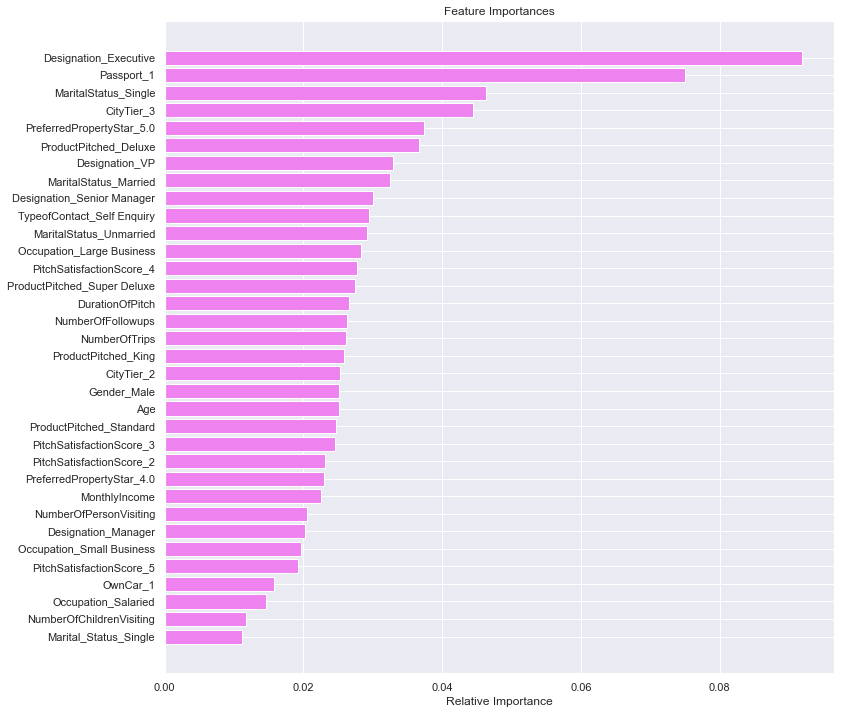

In [184]:
feature_names = X_train.columns
importances = xgb_c_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Designation is the most important feature followed by if the customer is a passport owner, marital status is next, etc

### <a id = "link10"></a> Business Recommendations

- We have used Ensembled Techniques to build a model to help the client in prediction:
    - Policy Marker and Marketing can deploy this model to identify potential customer that will purchase the travel package
    - Focus on Features that helps improve clients interest on purchasing the travel package
    - Help the policy markers develop packages that can be more attractive based on model prediction

* Customer Details that ensure purchase of travel package -  Designation, Passport, Marital Status, City Tier, Property Rating, Product Pitched, etc.

    - Designation: Of all the different Designations Executive has the highest data collection and also shows to have purchased the travel package followed by Senior Manager, Manager with AVP coming in last.  Policy markers can ask these customers things they like about the travel package and tailor the same product to other customers to attract more customers.
    
    - Passport: The model picks Passport as the next most importance customer information. This makes sense because most people that likes to travel knows the importance of having a passport.  Policy Markers can create a program to help easing the process of getting a passport or work in colaboration with local passport offices to help increase traffic and business. During the EDA, we saw that most of the passport owners do purchase the package.
    
    - Marital Status - This is important, and during EDA we saw that singles tend to purchase the package more.  This is understandable because most folks have to plan travel ahead of time and the cost might be and issue as well.  Policy markers and marketing team can device an incentivize package that offers additional discounts if more than one person is traveling
    
    - City Tier - Model is showing that location where the customer lives affects their chances of purchasing. We saw earlier city tier level three, lowest tier, tends to purchase the travel package more. It will be great to have another feature that describes where the customers live
    
    - Property Rating - Policy Markers should get more properties with higher ratings. Having more properties increases variety and can ensure return business.


In Summary, the Policy Markers and Marketing team should create a survey or information gathering process to target the highest ranked customer details by the model and gather information about them that they love about the packages and create hybrid packages to attract more customers.
Incentives the Executives to keep them coming back. Maybe like a travel reward program or points, or give them free trips after certain number of trips.


**Customers that will Likely Purchase the new Product**

In [200]:
# df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]

purchase =data.loc[(data.Designation=='Executive') & (data.CityTier==3) 
                   & (data.Passport==1)& (data.Marital_Status=='Single') & (data.PreferredPropertyStar==3)]

In [201]:
pd.set_option('display.max_rows', None)
purchase

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Marital_Status
36,1,50.0,Self Enquiry,3,9.000000,Small Business,Male,2.0,4.0,Basic,3.0,Divorced,2.0,1,4,0,0.0,Executive,17683.0,Single
127,1,19.0,Self Enquiry,3,28.000000,Small Business,Male,2.0,3.0,Basic,3.0,Single,2.0,1,2,0,1.0,Executive,16675.0,Single
363,1,33.0,Self Enquiry,3,11.000000,Small Business,Female,2.0,3.0,Basic,3.0,Single,2.0,1,2,1,0.0,Executive,17851.0,Single
665,0,47.0,Self Enquiry,3,8.000000,Salaried,Female,3.0,4.0,Basic,3.0,Single,2.0,1,2,1,0.0,Executive,18294.0,Single
763,0,34.0,Self Enquiry,3,16.000000,Salaried,Female,2.0,3.0,Basic,3.0,Divorced,2.0,1,2,0,1.0,Executive,17220.0,Single
776,1,20.0,Company Invited,3,15.000000,Small Business,Female,2.0,3.0,Basic,3.0,Single,2.0,1,4,0,0.0,Executive,17323.0,Single
911,1,25.0,Company Invited,3,30.000000,Salaried,Male,3.0,5.0,Basic,3.0,Single,2.0,1,1,1,1.0,Executive,16118.0,Single
1102,0,36.0,Self Enquiry,3,8.000000,Salaried,Male,3.0,3.0,Basic,3.0,Single,4.0,1,3,0,0.0,Executive,17644.0,Single
1153,1,18.0,Company Invited,3,9.000000,Small Business,Female,3.0,3.0,Basic,3.0,Single,2.0,1,5,0,1.0,Executive,16569.0,Single
1597,1,19.0,Self Enquiry,3,28.000000,Small Business,Male,2.0,3.0,Basic,3.0,Single,2.0,1,1,1,0.0,Executive,16675.0,Single


In [202]:
purchase.shape

(30, 20)

- The Thirty, 30, customers above are more likely to purchase the new package to be introduced